## Data Science in Finance - Predicting Bankruptcy of Firms
# Final Project Report - Data Science Workshop 
#### Students: Eliran Sabag & Gil Meiri

## 1. Goal

The goal of this project is to use financial data to try to predict if a company will declare bankruptcy in the next couple of years. In this project we will try to outperform a measure that is widely used today called Altman's Z-Score.

Since this project is a learning exercise, another side goal (which is a more important one) is to try to learn and practice as much as possible of what we have learnt throughout this workshop. We will train several models, both models we have used throughout this workshop and advanced models that use advanced libraries and techniques. In the process we will try to answer the following questions, do certain machine learning algorithms perform better on this type of problem? Does adding more features aid in creating better models?

## 2. Motivation

Many things come into consideration when investors decide to invest in a company. An important consideration is the ability to predict the financial distress and potential default of companies. Company bankruptcies may seem like rare events but they are not. According to Dr. Edward Altman<sup>[1](#myfootnote1)</sup>, the undisputed leading researcher in the field, every year in the US alone on average 20, large, billion dollar companies go bankrupted. According to him in "good years" (or bad years depending on the way you look at it), there are up to 80 of companies that go bankrupted.

Thus, in the market, every year there is allot of money that could essentially be lost due to bankruptcy. The ability to gauge a company's financial wellbeing and predict the likelihood of a company's default could save potential investor allot of money. Other investors may see it as an opportunity since it is possible to short a failing company's stock and profit off their default.

To many investors one of the most important indicators of a company's financial health is its credit rating. Credit ratings provide retail and institutional investors with information that assists them in determining whether issuers of bonds and other debt instruments and fixed-income securities will be able to meet their obligations. Credit ratings are issued by credit rating agencies such as Standard & Poor's (S&P), Moody's and Fitch Group. These ratings are usually based on a letter system which is slightly different for different agencies. This can be seen in [Figure 1](#myfigure1). In general a 'AAA' rating indicates a high investment grade where there is no to low potential for default on debt. On the contrary a 'D' rating indicates a low investment grade meaning the debtor has defaulted. 

| ![](https://gist.githubusercontent.com/GilMe/198f3fa40ab7d389377500bdbe79ddf0/raw/73ea0047f32764a8a907cac685366a40d5e76645/credit_ratings.png) |
|:--:| 
|<a name="myfigure1">1.</a> ***Figure 1:*** Credit rating grades of major ratings agencies |

Credit rating agencies are supposed to provide objective analyses and independent assessments of companies. Even though the ratings are supposed to be objective for various reasons this is not always the case. Credit rating agencies came under heavy scrutiny and regulatory pressure following the financial crisis and Great Recession of 2007 to 2009. It was believed that they provided ratings that were too positive, leading to bad investments. Part of the problem was that despite the risk, the agencies continued to give mortgage-backed securities (MBSs) AAA-ratings. The agencies were accused of trying to raise profits as well as their market share in exchange for these inaccurate ratings. This helped lead to the subprime mortgage market collapse that led to the financial crisis. 

Since the credit rating agencies have such a profound impact on the market, their ratings can temporarily skew the marketplace. Before the 2007 financial crisis there were a few investors that saw that junk bonds which were most likely to default were being rated as AAA by credit rating agencies. They did this by painstakingly analyzing the data in the mortgage-backed securities (MBSs). In turn they knew that these incorrect ratings would lead to a market collapse. They were able to predict this a few years before the collapse actually happened. This insight made it possible for them to make a substantial profit by shorting those bonds. 

The lesson that can be learned from what happen in 2007 is that creating a better predicter for company bankruptcy could help in detecting an impending financial crisis. The ability to detect the true probability of company default and compare it to the rating agency's ratings might help raise red flags when they diverge. 

<a name="myfootnote1">1.</a>    Dr. Edward Altman Lecture - "50 years of Z score" [Link](https://youtu.be/2NAiSeaipYY?t=2005)

## 3. Background

Credit scoring systems for identifying determinants of a firm's repayment likelihood probably go back centuries to the times of the crusades. They were in much greater use in the 19th century in the US as companies and entrepreneurs helped to grow the economy. Back then primitive financial information was usually evaluated by lending institutions, with primary types of information acquired being subjective or qualitative in nature. It was not until the early 20th century that rating agencies started to introduce univariate accounting measures and industry per-group comparisons, with rating designations. 

The development of multivariate models that used accounting with market measures started in the late 60s. One of the most famous models is the Altman Z-Score model that was developed in 1968 by NYU Stern Finance Professor Edward Altman. Since its inception it has been revised a few times but still remains a gold standard as a measure of the likelihood of a company to declare bankruptcy. 

The original Altman Z-Score was built using data from a sample of 66 manufacturing corporations. The first group contained 33 corporations that went bankrupt from 1946 to 1965. The second group consisted of 33 corporations in good financial health. The original Altman Z-Score was calculated using the following formula:

$$Z = 1.2X_1 + 1.4X_2 + 3.3X_3 + 0.6X_4 + 1.0X_5$$
where: 
$$X_1 =\frac{working\ capital}{total\ assets}
;X_2 =\frac{retained\ earnings}{total\ assets}
;X_3 =\frac{earnings\ before\ interest\ and\ taxes}{total\ assets}
;X_4 =\frac{market\ capitalization}{total\ liabilities};$$
$$X_5 =\frac{revenues}{total\ assets}$$

A score below 1.8 means it's likely the company is headed for bankruptcy. This is usually called the distressed zone. A scores above 3 are companies that are financially sound, which is referred to as the safe zone. Everything in between is considered the gray zone.

The original Alman's Z-Score was limited. It only focused on publicly traded manufacturing corporations and was unable to predict the probability of default for companies in sectors other than manufacturing. The sample set used to create the model was also quite small. Subsequent models were created throughout the years. This includes the Altman Zeta Model that was developed in 1977, Z'-Score model in 1983 and the Z''-Score model. Out of these models the Z''-Score is the most general and uptodate model. It was created for both manufacturing and non-manufacturing enterprises (as opposed to other models) and enterprises in emerging markets. In 2012 Altman updated the model once again calling it the Altman’s Z-Score plus Model. It can be used to evaluate both manufacturing and non-manufacturing firms and public and private companies in both U.S & non-U.S companies. The Z-Score plus is available as a commercial product.

In our project we will be using both the Z-Score and the Z''-Score models as a benchmark to test our models that we will be developing. Z''-score is the most uptodate freely available model and the original Z-Score is still widely used. The formula for the Z''-Score is as follows:

$$Z'' = 6.56X_1 + 3.26X_2 + 6.72X_3 + 1.05X_4$$
where X<sub>1</sub>, X<sub>2</sub>, X<sub>3</sub> and X<sub>4</sub> are as before. 

A Z''-Score of below 1.1 means it is likely the company is headed for bankruptcy (distress zone), while companies with scores above 2.6 are not likely to go bankrupt (safe zone).

The both Z-Score models were created a long time ago with a limited datasets. Today we have access to larger, uptodate data and better techniques, both of which we are planning on leveraging in order to create more accurate predictions. 

## 4. Structure of the Notebook 

The project will be conducted in stages. Section 5 will deal with the construction of the database. Since we could not find a suitable dataset, we will have to create one ourselves. This includes sourcing the data, cleaning it and creating training and test sets. We will start by building a general database that will hold all the information we need. In a future section we will create all the datasets we need from this database.

After building the database, in section 6 we will do some data exploration on it. In this section we will not only analyze the data but will also clean it from outliers. We will use the results from the analysis to give us some insights that will aid us in the subsequent sections.

In section 7 we will start building our models. Our first step is to choose a metric with which to compare the models. Then we will then build two datasets. The first dataset, which we call dataset1, contains all the features used by Altman's Z-Scores. The second dataset (dataset2) is like the first but with extra features we thought could aid in predicting future bankruptcies, the most significant being the company’s sector. We will then build and compare models on the two datasets. For dataset1 we will build the following models:
* Altman's Z-Score
* Altman's Z''-Score
* Logistic Regression
* Decision Tree
* SVM
* Neural network

For dataset2 we will build the same models (apart from the Z-Scores).

Section 8 is called advanced models. In this section we will go all out and build two advanced models on dataset2. We will also be doing some feature engineering to add additional features. Our first model will use an advanced ML library called Tree-based Pipeline Optimization Tool (TPOT). Our second model is a special hand-crafted model. We would like to point out that this section is an extension to the project and was not part of our initial proposal.

In section 9 is the summary and our final conclusions section.

## 5. Database and Datasets

### 5.1 Dataset Specification

In order to complete the project, we need a dataset. Unfortunately, there is no readymade dataset that meets our requirements. This means that will need to construct one using different resources (which turned out to be a large undertaking). 

It is important before we begin to define the specifications we will need for the dataset we are going to construct. The first specification is that we need to find good sources of information. The sources should be reliable and as complete as possible. The second is that we will need to find sources for both the features and the labels. 

As stated above we will create two datasets. One which includes the features used in Alman's Z-Score. The second dataset will include additional features in order to see if more features can improve the model's performance. Each data point for both datasets will be the financial information for a certain company, for a certain year and quarter (the companies name, year and quarter information are not features in our dataset). The label will be if the said company declared bankruptcy, be it chapter 11 bankruptcy (company reorganization) or a chapter 7 bankruptcy (company liquidation), in the following two years. 

We have to take into account an important point. After declaring bankruptcy, a company does not necessarily stop its operations. This is especially true for chapter 11. Since we are trying to predict companies in financial distress, we do not want to have financial data of companies after they have declared bankruptcy. That is why we will not include datapoints in our datasets for companies after they have declared bankruptcy.

### 5.2 Sources

It took us a long time and many attempts to find a good source and build a good dataset (which was to be expected). The process usually involved finding a potentially good source, going through the data to understand it (usually with code but sometimes doing manual checks), finding problems or inconsistencies, and finding a new potential source for data. In this section we will represent all the sources we came across through our search and why we finally settled on the sources we chose to use. 

The sources are divided into two groups. Sources for financial data to be used as features and sources to find companies that have declared bankruptcy and when they have done so (used to construct the labels of our dataset). 

Every company that is traded is regulated by the U.S. Securities and Exchange Commission (SEC). Fortunately, most of the features used to calculate Altman's Z-Score are published on 10-K forms that all traded firms are required to submit to the U.S. Securities and Exchange Commission (SEC). Each company is required to publish these reports quarterly. 

In order to create the labels, we will need to compile a reliable list of all the companies that declared bankruptcy and the date in which they declared bankruptcy. Bankruptcy can either be a chapter 11 bankruptcy (company reorganization) or a chapter 7 bankruptcy (company liquidation). It is important that this list is as accurate as possible.

When picking sources there are a few things that need to be taken into account. We were unable to find a single source that included all the information we needed for all the publicly traded companies. This is true for both the financial data (features) and list of company bankruptcies (labels). We could try merge data from different sources. The problem is because of different accounting definitions, there are inconsistencies between the different sources. For instance if we take financial information for companies that haven't declared bankruptcy from once source and financial information for companies that have declared bankruptcy from another source, the definitions for certain features in the financial information might be different in the two sources, which might cause a problem. Another thing we need to take into account is that small companies, those that are not traded on the stock exchange, do not publish reliable information since they aren't as heavily regulated as those that are traded on the stock exchange. We might want to avoid these companies altogether in our dataset.

The Sources for financial data (features):
1. The U.S. Securities and Exchange Commission (SEC) has a number of databases. One of the databases is the "financial statement dataset" which can be found [here](https://www.sec.gov/dera/data/financial-statement-data-sets.html). This dataset contains all the financial statements filed with the SEC from 2009 Q1 to 2020 Q1 (for all companies). As such they also include all the filings of 10-K forms submissions of the various companies. The 10-K is the quarterly report each company is obliged to file. It includes most of the features that we need to calculate a company’s Altman's Z-Score. We ended up not using this dataset since we found that for some reason it is incomplete. It is missing allot of companies and some of the 10-K where complete in the sense that there were missing features. 
2. "Financial modeling prep" is a database that holds financial information for various companies. It is a subscription-based database. The database has an [api](https://financialmodelingprep.com/developer/docs/). We end up not using this service because it wasn't free and we got access to a better database.
3. Stackrow is a free database which get financial information for companies through an api. The api allows us to download information for a given company in excel format according to different criteria. We ended up not using this database because some accounting information was missing.
4. "S&P Capital IQ" is also a financial information database. It is subscription-based database. It holds both the financial information needed to calculate the Altman Z-Scores for various companies and also holds a list of all the companies that have declared bankruptcy. This is the database we ended up using since it is the most complete, and we had access to it.

Sources for bankruptcy data (for finding labels). Note that when compiling the list, we looked to create a list that was both complete and that we could find a good source of financial data for those companies:
1. The U.S. Securities and Exchange Commission (SEC) has a database called "Public Company Bankruptcy Cases Opened and Monitored" which can be found [here](https://www.sec.gov/open/datasets-bankruptcy.html). This includes This file contains a list of the bankruptcy cases for public companies filed under Chapter 11 of the Bankruptcy Code opened and monitored since the fiscal year 2009 to the year 2011. We ended up not using this dataset since it was very small (only 2009-2011). Also, when comparing it to other sources we saw that it was missing companies that declared bankruptcy in those years.
2. We found lists of companies that declared bankruptcies in Wikipedia. Wikipedia has two relevant categories, "Companies that have filed for chapter 11 bankruptcy by year" [link](https://en.wikipedia.org/wiki/Category:Companies_that_have_filed_for_Chapter_11_bankruptcy_by_year) and "Companies that have filed for chapter 7 bankruptcy"[link](https://en.wikipedia.org/wiki/Category:Companies_that_have_filed_for_Chapter_7_bankruptcy). These are lists include both public and private companies (we only need public). We decided not to use this as a source for two reason. It didn't list all the companies, many of the companies listed were private and even if we used this as a source, we would have to find a reliable source to get the financial information for these companies. 
3. UCLA-LoPucki Bankruptcy Research Database (BRD). This is an extensive database which can be found [here](https://lopucki.law.ucla.edu/index.htm). The database is not free but there is an option to run a one variable study and query the database, which is all we need to extract the names of companies that declared bankruptcy. We decided not to use this for a few reasons. First it only includes very large companies whose reported assets are more than $100 million. Secondly, we could only extract the year in which the company declared bankruptcy, not the quarter.
4. "Finra Over-the-Counter-Equities" database. There is a possibility to query this database and get a list of companies that declared bankruptcy for OTC stocks [here](https://otce.finra.org/otce/dailyList?viewType=Bankruptcy). These are not companies that are traded on exchanges. We decided not to use this database since the companies there were OTC companies. These are small companies and since they are not as heavily regulated as companies traded in the exchanges there published financial information is usually not very accurate.
5. Theoretically we could find companies that declared bankruptcy through 8-K forms they submit to the SEC. If a company declares bankruptcy it is required by the SEC to submit a statement to the stock market. They do this through the 8-K form. The 8-K form is used to notify the stock market of special events, not only bankruptcy. In fact, most of the 8-K reports are not of bankruptcies. The document is usually formatted as a letter to the market. There is no standardized form for these announcements. This means that every bankruptcy statement can be a little bit different from the rest. This makes it difficult to find which companies went bankrupt and when. We found that we could use various searches to look for certain phrases in these forms that usually come up in these statements. One such expression is "filed a voluntary petition in the United States Bankruptcy Court". We started to investigate this technique but eventually decided not to use it since we found a better source of information. 
6. "S&P Capital IQ" database. It holds a list of all the companies that have declared bankruptcy. Since we were using the same database to find the financial information for companies, the combination of the two gave the most complete list.

So, in the end we chose to use "S&P Capital IQ" database since it had all the information we needed to create the datasets. Since the financial information for both the bankrupt companies and non-bankrupt companies came from the same source, we know that the accounting information is consistent.

The "S&P Capital IQ" had a feature called "Industray" which was too specific with 158 different values for this field. We wanted to change this field into something less specific like the sector the company is in. We used the Wikipedia page for "Global Industry Classification Standard" in order to do the translation. So, we can also list that as one of our sources. The page can be found [here](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard). We will expand more on this source when we use it further in this notebook.

### 5.3 Building the Datasets

As stated above we finally settled on using the "S&P Capital IQ" database to construct out dataset. We used the database to extract all the features that are used in Altman's Z-Score:
1. Total assets
2. Working capitol 
3. Retained earnings 
4. Earnings before interest and taxes 
5. Market capitalization 
6. Total liabilities  
7. Revenues

These are all features used in the first dataset. On top of that we also extracted the following features which are used in the second dataset:
1. EPS
2. Stock price
3. Current assets
4. Current liabilities
5. Industray

The database was queried and the results were exported as excel documents. There are two such documents, one for the companies that declared bankruptcy and another for normal companies. We will explain the criteria’s of how we chose the bankrupted companies and how we chose the normal companies.

In order to choose the bankrupt companies, we queried the database for all the bankrupted companies. We exported the data into "ALTMAN.xls". We then took these companies and looked at their market cap. We saw an uneven distribution where most of the companies had a market cap of below $20 billion. 

For the list of companies that did not declare bankruptcy, we wanted to create a list of comparable companies since we did not want there to high bias of companies with a large market cap in our dataset. We looked for an exchange-traded fund (ETF) which is comprised with companies that fit this market cap distributions criteria. Apart for the market cap we also looked that the ETF would include companies with similar distribution on the types of industries.  We eventually found the "Vanguard small-cap ETF" which held comparable companies. This list holds 400 companies. We took the list of companies and queried the "S&P Capital IQ" database for financial information for those companies. We exported the data into "SMALL CAP ETF.xls"

We will just note that the start date for the bankruptcies in "ALTMAN.xls" is 1990-01-15. The start date for the financial data for both "SMALL CAP ETF.xls" and "ALTMAN.xls" it is 2007-12-31

In the next section we will look at the raw data. The format of the data as it appears in the excel sheets isn't convenient in order to create the desired datasets. To aid us with the creation of the datasets we will create a few databases. The first database is a database that will hold all the values for all the features for the various companies the different dates. The other databases will hold the all the features together with the labels.

From these databases we will create the different datasets. From these datasets we will finally create the training and test sets.

### Initialization

Now for some code. Our first step is to initialize some things we will need. We will start with importing some libraries.

In [1]:
import itertools as it
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import sklearn.metrics as skm
from sklearn.preprocessing import StandardScaler

import seaborn as sns

Next we will create constants which we will use later.

In [2]:
ALL_FEATURES = ['Total ASSETS',  # Features found in the sheets
                'Working capital',
                'Retained Earnings',
                'EBIT ',
                'Total Liabilities',
                'Market Capitalization',
                'Revenues',
                'EPS',
                'STOC PRICE',
                'Current Assets',
                'Current Liabi']

FEATURE_NAMES_FIX_EXCEL_TO_DB = {'Total ASSETS':'total_assets',
                            'Working capital':'working_capital',
                            'Retained Earnings':'retained_earnings',
                            'EBIT ':'ebit',
                            'Total Liabilities':'total_liabilities',
                            'Market Capitalization':'market_cap',
                            'Revenues':'revenues',
                            'EPS':'eps',
                            'STOC PRICE':'stock_price',
                            'Current Assets':'current_assets',
                            'Current Liabi':'current_liabilities'}


FORWARD_FORECAST = pd.to_timedelta('2Y') # How much forward will bunkruptcies occur

NO_BANKRUPT = 0 # Value for label if no bankruptcy
BANKRUPT = 1 # Value for label if bankruptcy

BANKRUPT_FILE = 'Data/ALTMAN.xls' # location of excel file with the data for all the bankrupt companies
SMALL_CAP_FILE = 'Data/SMALL CAP ETF.xls' # location of excel file with the data for all the small cap ETF companies (non bankrupt companies)

# names for the features in the various datasets
DATASET1_FEATURES = ['total_assets','working_capital','retained_earnings','ebit','market_cap','total_liabilities','revenues']

DATASET1_FEATURES_NORM =['total_assets_norm','working_capital_norm','retained_earnings_norm','ebit_norm',
                         'market_cap_norm','total_liabilities_norm','revenues_norm']

DATASET2_FEATURES = ['total_assets','working_capital','retained_earnings','ebit','market_cap','total_liabilities','revenues',
                    'eps', 'current_assets', 'current_liabilities', 'sector_num', 'sector_txt']



SECTOR_ONE_HOT = ['Energy', 'Materials', 'Industrials', 'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 
                  'Information Technology', 'Communication Services', 'Utilities', 'Real Estate']



### Looking at the raw data

We can now start to look at the raw data. We will pull the data from the excel files. The data in the excel files the data is organized in the following way. There are various sheet tabs. One tab for each feature. The sheet for each feature is a two-dimensional table. The rows represent the different companies and the columns the dates for the information (one for each quarter). In the "ALTMAN.xls" file there is an extra tab called screening. It contains a list of all the companies that declared bankruptcy and the date in which they declared bankruptcy. We will use this data in this tab to create the labels.

First let’s look at the raw data from the excel sheets. The following is the code to pull the data into pandas. We will also print the sheet names for both documents.

In [3]:
# Pull data from excel files
xls_bankruptcies = pd.ExcelFile(BANKRUPT_FILE)
xls_small_cap = pd.ExcelFile(SMALL_CAP_FILE)

# Print the different sheet names
# xls_bankruptcies.sheet_names, xls_small_cap.sheet_names
print("The names of the sheets in "+BANKRUPT_FILE+" are:")
print(', '.join(xls_bankruptcies.sheet_names))
print("\nThe names of the sheets in "+SMALL_CAP_FILE+" are:")
print(', '.join(xls_small_cap.sheet_names))

The names of the sheets in Data/ALTMAN.xls are:
Screening, Total ASSETS, Working capital, Retained Earnings, EBIT , Total Liabilities, Market Capitalization, Revenues, EPS, STOC PRICE, Current Assets, Current Liabi, _CIQHiddenCacheSheet, Screen Criteria

The names of the sheets in Data/SMALL CAP ETF.xls are:
Total ASSETS, Working capital, Retained Earnings, EBIT , Total Liabilities, _CIQHiddenCacheSheet, Market Capitalization, Revenues, EPS, STOC PRICE, Current Assets, Current Liabi


We can see that this dataset isn't clean. There are missing values. An example can be seen in row 3 in the following example for the second index for the company with the NasdaqCM:CTRC symbol.

In [4]:
# Features Example, we can see there is missing data
xls_bankruptcies.parse(ALL_FEATURES[0])

Unnamed: 0 IQ_TOTAL_ASSETS  \
0                               Industray          Symbol   
1                         Pharmaceuticals   NasdaqGS:AKRX   
2      Oil and Gas Equipment and Services    OTCPK:HOSS.Q   
3                    (Invalid Identifier)   NasdaqCM:CTRC   
4                       Department Stores    OTCPK:JCPN.Q   
..                                    ...             ...   
390                      Specialty Stores    NasdaqGS:EYE   
391                                  Gold      OTCPK:IPMG   
392                              Footwear      OTCPK:LAGR   
393  Electronic Equipment and Instruments      OTCPK:AGTT   
394                     Department Stores          NYSE:M   

               Unnamed: 2            Unnamed: 3            Unnamed: 4  \
0     2007-12-31 00:00:00   2008-03-31 00:00:00   2008-06-30 00:00:00   
1                  86.966                83.826                80.518   
2                 1262.05               1300.06               1381.57   
3    (Invalid Identifier)  (Invalid Identifier)  (Invalid Identifier)   
4                   13967                 14309                 13448   
..                    ...                   ...                   ...   
390               128.528               128.528               128.528   
391                 6.153                 6.153                 6.153   
392                58.867                58.867                58.867   
393               1.65878               1.65878               1.65878   
394                 29669                 27789                 27579   

               Unnamed: 5            Unnamed: 6            Unnamed: 7  \
0     2008-09-30 00:00:00   2008-12-31 00:00:00   2009-03-31 00:00:00   
1                  90.263                82.329                89.547   
2                 1519.77               1595.74               1659.75   
3    (Invalid Identifier)  (Invalid Identifier)  (Invalid Identifier)   
4                   13796                 14098                 12011   
..                    ...                   ...                   ...   
390               128.528               128.528               128.528   
391                 6.153                 6.153                 6.153   
392                58.867                58.867                58.867   
393               1.65878               1.65878               1.65878   
394                 27993                 28904                 22145   

               Unnamed: 8            Unnamed: 9  ...           Unnamed: 43  \
0     2009-06-30 00:00:00   2009-09-30 00:00:00  ...   2018-03-31 00:00:00   
1                    76.8                74.426  ...               1863.47   
2                 1682.38               1766.13  ...               2729.05   
3    (Invalid Identifier)  (Invalid Identifier)  ...  (Invalid Identifier)   
4                   11745                 12169  ...                  8454   
..                    ...                   ...  ...                   ...   
390               128.528               128.528  ...               1644.55   
391                 6.153                 6.153  ...                 6.153   
392                58.867                58.867  ...                58.867   
393               1.65878               1.65878  ...               1.65878   
394                 21331                 20784  ...                 19583   

              Unnamed: 44           Unnamed: 45           Unnamed: 46  \
0     2018-06-30 00:00:00   2018-09-30 00:00:00   2018-12-31 00:00:00   
1                 1786.56               1715.19               1495.26   
2                 2689.16               2654.74               2764.64   
3    (Invalid Identifier)  (Invalid Identifier)  (Invalid Identifier)   
4                    8305                  8058                  8415   
..                    ...                   ...                   ...   
390               1639.44               1660.69               1661.39   
391                 6.1

### Parsing the data

Now that we understand how the data is formatted in the excel documents we can get the data and parse it to a more comfortable form. To make this easier we created the raw_data_parser function. The purpose of this function is to both parse and clean the incomplete data from the excel file. The input is the file name of the excel file and a list containing the symbols of companies with incomplete data. The output of this function is a pandas dataframe that holds for each row, the company name, the date for the data and the values for all the features in the excel file.

The way the function works is as follows. In the excel document, every feature is in a different sheet. As we saw every sheet has rows corresponding to the company name and columns corresponding to the dates. We first want to create a dataframe for every feature. In order to do this, we run a for loop of all the features. For every feature we extract the appropriate sheet into a new dataframe. We clean the rows with the missing information (those whose 'Industry' is labels 'Invalid Identifier' and stocks that have NaN in their data). 

Next step is to drop the 'Industray' column which we will reintroduce it later on. Then we set the index to 'Symbol' of the dataframe, stack all the other columns and set the name of the column to the name of the feature. The stack() method also set a second index level for the report date. We do this for all features and append them in a features list. All this is done in a for loop.

We then concatenate the dataframes in the features list (using axis = 1) into one dataframe. Next, we rename to columns to make it nicer and change all the values to float. We then reintroduce the 'Industray' column. Finally, we clean the rows where the total_assets or total_liabilities are zero. The is because these are in the denominator of the Altman's Z=scores and they are also probably indicators of bad values. We return the results

In [5]:
# raw_data_to_database
#
# This function extracts the data from the raw excel sheet into the database format we need  
#
def raw_data_parser(file_name, remove_list):
    features = []
    # Go over all the features, parse and clean the data 
    for f in ALL_FEATURES:
        result = pd.read_excel(file_name, sheet_name=f, skiprows=1)
        # Remove Empty and NaN data
        result = result[result['Industray']!='(Invalid Identifier)']
        result = result[~np.isin(result['Symbol'], remove_list)]
        feature = pd.DataFrame(result.
                               drop(columns=['Industray']).
                               set_index('Symbol').
                               stack(), columns=[f])
        features.append(feature)
    
    # concatinate all the features
    result = pd.concat(features, axis=1)

    # Fix columns naming
    result.index.rename('Date', level=1, inplace=True)
    result.rename(columns=FEATURE_NAMES_FIX_EXCEL_TO_DB, inplace=True)
    result = result.astype(float, errors='raise') # Force float
    

    # Reintroduce industray
    companies =  pd.read_excel(file_name, sheet_name=ALL_FEATURES[0], skiprows=1)[['Symbol', 'Industray']]
    result = result. \
          reset_index().\
          merge(companies[['Symbol','Industray']],
                left_on='Symbol',
                right_on='Symbol').\
                set_index(['Symbol','Date'])
    
    # Clean zero values for total_assets and total_liabilities
    result = result[result.total_assets!=0]
    result = result[result.total_liabilities!=0]
    
    return result

We will now parse the data for the file containing the bankrupt companies. The companies that were removed in the br_remove_list are companies that either had rows with NaN values or had missing information such as a market_cap of zero for the whole period.

In [6]:
br_remove_list = ['-','NYSE:CIT', 'OTCPK:ACBC.Q', 'OTCPK:AMTC.Q', 'OTCPK:BCBF', 'OTCPK:BHBC.Q', 'OTCPK:CIBH', 
                  'OTCPK:FNBC.Q', 'OTCPK:HVYB', 'OTCPK:LIQD.Q', 'OTCPK:NXTY.Q', 'OTCPK:RESC.U', 'OTCPK:TCPP',
                  'OTCPK:TMCV', 'OTCPK:WTEC.Q']
data_br = raw_data_parser(BANKRUPT_FILE, br_remove_list)
data_br;

We will do a sanity check to see that there are no empty fields

In [7]:
# Final sanity check
data_br.isna().sum(axis=0)

total_assets           0
working_capital        0
retained_earnings      0
ebit                   0
total_liabilities      0
market_cap             0
revenues               0
eps                    0
stock_price            0
current_assets         0
current_liabilities    0
Industray              0
dtype: int64

Will do the same for the small cap companies (non-bankrupt)

In [8]:
sc_remove_list = ['ASB', 'BOH', 'BXS', 'CATY', 'CBSH', 'CFR', 'CIT', 'EVR', 'EWBC',
                  'FFIN', 'FHN', 'FNB', 'FULT', 'HOMB', 'HWC', 'IBKR', 'IBOC',
                  'NAVI', 'NYCB', 'OZK', 'PACW', 'PB', 'PNFP', 'SBNY', 'SF', 'SLM',
                  'SNV', 'STL', 'TCBI', 'TCF', 'TRMK', 'UBSI', 'UMBF', 'UMPQ',
                  'VLY', 'WAFD', 'WBS', 'WTFC']

data_sc = raw_data_parser(SMALL_CAP_FILE, sc_remove_list)
data_sc;

# sanity check
data_sc.isna().sum(axis=0)

total_assets           0
working_capital        0
retained_earnings      0
ebit                   0
total_liabilities      0
market_cap             0
revenues               0
eps                    0
stock_price            0
current_assets         0
current_liabilities    0
Industray              0
dtype: int64

### Create features database

We will concatenate the two dataframes to create a single database for the features for both bankrupt companies and non-bankrupt companies.

In [9]:
features_db = pd.concat([data_br,data_sc], axis=0)

We need to further clean the database. As stated above we decided that we will not use the financial information of bankrupt companies for date that are after they have declared bankruptcy. We will remove these rows from our database. 

To do this we will extract the symbols of the companies that have declared bankruptcy and the date in which it was declared. We will extract this information from the bankrupt excel file. We will use the get_bankruptcies function to do this. It gets no inputs and returns a dataframe with company symbols and corresponding bankruptcy dates for each of the bankruptcy companies.

In [10]:
def get_bankruptcies():
    bankruptcies = pd.read_excel(BANKRUPT_FILE, sheet_name='Screening', skiprows=7,usecols=['Exchange:Ticker','Bankruptcies -  [All History]'])
    bankruptcies['bankruptcy_date'] = [pd.to_datetime(x[:-4]) for x in bankruptcies['Bankruptcies -  [All History]']]
    bankruptcies.drop(columns=['Bankruptcies -  [All History]'], inplace=True)
    # Change names to match database
    bankruptcies.rename(index=str,columns={"Exchange:Ticker": "Symbol"}, inplace=True)
    # Set the index to Symbol
    bankruptcies.set_index('Symbol', inplace=True)

    return bankruptcies

# bankruptcies = get_bankruptcies();
# bankruptcies

We will use the delete_after_bankruptcy function to remove all the datapoints that occur after the bankruptcy. This function gets the features database and the bankruptcy dataframe as inputs and outputs the dataframe without the datapoints of bankrupt companies that occurs after the bankruptcy.

In [11]:
def delete_after_bankruptcy(database):
    
    # Get the bankruptcies dataframe
    
    bankruptcies = get_bankruptcies();
    
    data_flat = database.copy().reset_index()
    
    for symbol in np.unique(database.index.get_level_values(0)):
        vkeys = bankruptcies.index.intersection([symbol])
        if vkeys.size == 1:
            bankruptcy_date = bankruptcies.loc[symbol].values[0]
            mask = (data_flat['Symbol'] == symbol) & (data_flat['Date'] > bankruptcy_date)
            data_flat[mask] = np.NaN
        
    data_flat.dropna(inplace=True)
    results = data_flat.set_index(['Symbol', 'Date'])
    return results

features_db = delete_after_bankruptcy(features_db).copy()
# features_db

### Adding sector to database

If we look at the 'Industray' feature we will see that it is too detailed. There are potentially 158 different values in this field. Since we have a limited amount of datapoints in our dataset, this could be problematic. We really do not need that level of detail. Instead of using the industry as a feature, we would like to use the sector the company is in. We can find the sector from the industry using the table in the Wikipedia page for the Global Industry Classification Standard. The page can be found [here](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard). The 'Industray' feature in our database is actually the sub-industry column in the table on the wiki.    

In order to add the sector to our database we will use two helper functions. The first function get_industry_wiki_table will grab the table from the wiki page and returns it as a pandas dataframe. If we look at the table in the wiki page we will see that each value in the for each of the different fields (sector, industry group, industry and sub-industry) has both a numerical value and a textual value. For instance, the Sector column the 'Energy' sector has a numerical value of '10' which is the standard numerical identifier of the sector. In the dataframe we will return both these values.

In [12]:
import wikipedia as wp

def get_industry_wiki_table():
    # Grab the table from the wikipedia html and turn it into a dataframe
    html = wp.page('Global_Industry_Classification_Standard').html().encode("UTF-8")
    result = pd.read_html(html)[0]
    
    # Rename the columns so they make more sense
    result.rename(columns={'Sector': 'sector_num', 'Sector.1': 'sector_txt',
                          'Industry Group': 'industry_group_num', 'Industry Group.1': 'industry_group_txt',
                          'Industry': 'industry_num', 'Industry.1': 'industry_txt',
                          'Sub-Industry': 'sub_industry_num', 'Sub-Industry.1': 'sub_industry_txt'}, inplace=True)
    
    # Fix the description of sub_industry so that they match the format in the features database
    result['sub_industry_txt'] = result['sub_industry_txt'].str.replace('&','and')
    
    return result

sector_industry_table = get_industry_wiki_table()
sector_industry_table 

sector_num   sector_txt  industry_group_num industry_group_txt  \
0            10       Energy                1010             Energy   
1            10       Energy                1010             Energy   
2            10       Energy                1010             Energy   
3            10       Energy                1010             Energy   
4            10       Energy                1010             Energy   
..          ...          ...                 ...                ...   
153          60  Real Estate                6010        Real Estate   
154          60  Real Estate                6010        Real Estate   
155          60  Real Estate                6010        Real Estate   
156          60  Real Estate                6010        Real Estate   
157          60  Real Estate                6010        Real Estate   

     industry_num                                  industry_txt  \
0          101010                   Energy Equipment & Services   
1          101010                   Energy Equipment & Services   
2          101020                   Oil, Gas & Consumable Fuels   
3          101020                   Oil, Gas & Consumable Fuels   
4          101020                   Oil, Gas & Consumable Fuels   
..            ...                                           ...   
153        601010  Equity Real Estate Investment Trusts (REITs)   
154        601020          Real Estate Management & Development   
155        601020          Real Estate Management & Development   
156        601020          Real Estate Management & Development   
157        601020          Real Estate Management & Development   

     sub_industry_num                        sub_industry_txt  
0            10101010                    Oil and Gas Drilling  
1            10101020      Oil and Gas Equipment and Services  
2            10102010                  Integrated Oil and Gas  
3            10102020  Oil and Gas Exploration and Production  
4            10102030      Oil and Gas Refining and Marketing  
..                ...                                     ...  
153          60101080                       Specialized REITs  
154          60102010      Diversified Real Estate Activities  
155          60102020         Real Estate Operating Companies  
156          60102030                 Real Estate Development  
157          60102040                    Real Estate Services  

[158 rows x 8 columns]

The next function uses the table we created to add the sector (and also the industry_group and industry) to the database. We will use the sub_industry_txt field to lookup the sector. The 'sub_industry field' will be matched to the 'Industray' field in the database.

We will do this in the function called add_sector. It takes as an input a features database and return the database with the sector and industry group (both the numeric and text values). It will also change the 'Industray' field to sub_industry.

In [13]:
def add_sector(database):
    sector_industry_table = get_industry_wiki_table()
    result = database.join(sector_industry_table.set_index('sub_industry_txt'), on='Industray')
    result = result.drop(columns='Industray').copy()
    return result

features_db_with_sect = add_sector(features_db).copy()
features_db_with_sect;

### Adding labels to database

We will now add the labels to the database. We want to be able to create databases with different labels. The types of labels we are looking to create are if a company will declare bankruptcy in the following number of years. We would like to create the labels for different periods. For instance, we might want the period to be 2 years before bankruptcy or we may want 3 years. To do this we will create different databases. They will have the same features, but the label will relate to a different period before the bankruptcy. We will call this period forward_forcast.

We will create a function to help us do this. The function called add_labels takes as input the features database and the forward_forcast. It returns the database with a 'future_bankruptcy' label column which will indicate if there will be a bankruptcy in the following forward_forecast of years. The function takes as input the period as pandas timedelta object.

In [14]:
def add_labels(database, forward_forcast):
    result = database.copy()
    # Create labels and initialize them to NO_BANKRUPT
    result['future_bankruptcy'] = NO_BANKRUPT
    
    # Get the bankruptcy dataframe
    bankruptcies = get_bankruptcies();
    
    # Update the label for bankrupt companies
    for symbol in np.unique(result.index.get_level_values(0)):

        vkeys = bankruptcies.index.intersection([symbol])
        if vkeys.size == 1:

            # Set bankruptcy within forward forecast
            mask = result.loc[symbol].index > (bankruptcies.loc[symbol].values[0]-forward_forcast)
            dates = result.loc[symbol][mask].index.values
            result.loc[(symbol,dates),'future_bankruptcy'] = BANKRUPT
            
    # Force all values to be float
    result['future_bankruptcy'] = result['future_bankruptcy'].astype(float, errors='raise')

    return result



We will create a feature and label database with a forward forecast of 2 years to fit Altman's Z-Score predictability timescale.

In [15]:
feature_label_db_2yr = add_labels(features_db_with_sect, FORWARD_FORECAST).copy()

# feature_label_db_2yr

### Training and test sets

In order to create and test different models, we will need to create training and test sets. This task is challenging for our datasets. This is because of the way it is built (time series of financial information of companies) and the fact that we are working with the markets, which are ever changing, we have to be careful when doing the split in order to create a fair and accurate test set.

If we were to do a normal random split of our data, then our test set would be unreliable for two reasons:
1. Since every line in our dataset is a different quarter and year for a company, we could have a case where for a certain company one quarter's information would be in the training set and the next quarters information would be in the test set. Since the chances of the financial information for consecutive quarters being similar is high, we in fact are 'contaminating' the test set. 
2. The market is ever changing. The reason for bankruptcies in the 1950s may be different than for companies in 2020. That is why when we test our models we want to look at a just a certain time frame, preferably a more UpToDate time frame so we could be sure that our model will work on the current market.

To fix the first problem we will do a split on the companies, where certain companies will be allocated to the training set and others to the test set. We will do this separately for both bankrupt companies and non-bankrupt companies (to make sure that the ratios stay the same)

To fix the second problem, we will take distinct periods, one for the training set and another for the test set. We will choose the most UpToDate period to be part of the test set. In order to do this, we will have to choose the companies with the most recent bankruptcy dates be part of the test set. So, we will order all the bankruptcy companies by the date of their bankruptcy, take the first companies with the earliest bankruptcy date into the training set. The rest of the companies will be used in the test set. The period for all the companies in the training set (for both the bankrupt companies and non-bankrupt companies) will only be for dates before the last bankruptcy in the set.

For the test set, for all the companies (both bankruptcy and non-bankruptcy companies) we take only the financial information for a specific time frame. In order to set this time frame, we find the date of the last bankruptcy in the training set and take one year after that as the beginning of the period. So, let's say the last bankruptcy of training set is the 9th of May 2016, than the financial information in the test set (for ALL companies) will only be from 9th of May 2015 to 9th of May 2017.

We will build a split_train_test function to aid us with the split. This function splits the data into a training and test set as was described above. 

The split_train_test function takes as an input the data set, the percent of training data (percentage of test data is calculated). The output is the training set and the test set after the split.

In [16]:
def split_train_test(dataset, train_size=0.7):
    
    # Calculate test set size
    test_size = 1 - train_size
    
    bankruptcies = get_bankruptcies();

    # Make a list of bankrupt companies and sort by date of bankruptcy
    bankruptcies = bankruptcies.loc[np.isin(bankruptcies.index,dataset.index.levels[0])].sort_values(by='bankruptcy_date')#, inplace=True)

    # Make a list of non-bankrupt companies (we will flatten the dataset to make it easier)
    dataset_flat = dataset.reset_index()
    no_br_companies = np.unique(dataset_flat[~np.isin(dataset_flat.Symbol, bankruptcies.index)].Symbol)
    
    # First split bankrupt companies to train/val and test by bankruptcy date
    br_companies_train = bankruptcies.head(int((train_size)*bankruptcies.size))
    br_companies_test = bankruptcies.tail(int((test_size*bankruptcies.size)+1))
        
    # Next we split the non-bankrupt companies into train/val test
    np.random.seed(1) # Reproducable results
    no_br_companies_train = np.random.choice(no_br_companies, int(train_size*no_br_companies.shape[0]), replace=False)
    no_br_companies_test = no_br_companies[~np.isin(no_br_companies,no_br_companies_train)]
    
    # In the next part we will grab the datapoints from the dataset and clean them for the different periods
    
    # Grab the datapoints

    # For bankrupt companies
    br_train_set = dataset_flat[np.isin(dataset_flat.Symbol, br_companies_train.index)]
    br_test_set = dataset_flat[np.isin(dataset_flat.Symbol, br_companies_test.index)]
    #For the non bankrupt companies
    no_br_train_set = dataset_flat[np.isin(dataset_flat.Symbol,no_br_companies_train)]
    no_br_test_set = dataset_flat[np.isin(dataset_flat.Symbol,no_br_companies_test)]    
    
    # Find the last day for training set
    last_train_date = br_train_set.Date.max()

    # Find the First day for the test set
    first_test_date = last_train_date - pd.to_timedelta('1Y')
    
    # Clean the datasets
    # Remove all rows whose date is after the last_train_date for non-bankrupt companies in training set
    no_br_train_set = no_br_train_set[no_br_train_set.Date <= last_train_date]
    
    # Remove all rows whose date is before the first_test_date for companies in test sets
    br_test_set = br_test_set[br_test_set.Date > first_test_date]
    no_br_test_set = no_br_test_set[no_br_test_set.Date > first_test_date]
    
    # Combine to create datasets
    train_set = pd.concat([br_train_set,no_br_train_set], axis=0)
    train_set.set_index(['Symbol', 'Date'], inplace=True)

    test_set = pd.concat([br_test_set,no_br_test_set], axis=0)
    test_set.set_index(['Symbol', 'Date'], inplace=True) 

    return train_set, test_set

## 6. Data Exploration

### Methodology:
    a. Read the data and initial analysis
    b. Remove Outliers
    c. Dig deeper into the data
    d. Create composite features - Create new features base on the data to make better predictions
    e. Final conclusions

### 6.1 Read the data and initial analysis

In [17]:
data_flat = feature_label_db_2yr.reset_index().copy()
# feature_label_db_2yr.tail()

First of all we will have a look at the data statistics.

In [18]:
feature_label_db_2yr.describe()

total_assets  working_capital  retained_earnings           ebit  \
count  2.360800e+04     23608.000000       23608.000000   23608.000000   
mean   5.455049e+03       319.062921         533.640851     292.672146   
std    9.335393e+04     10948.741573        2641.655863    4954.319886   
min    1.200000e-04   -877792.000000      -18489.143000   -6134.780000   
25%    6.874372e+02         1.410032         -22.336550      22.982000   
50%    2.047044e+03       178.158000         211.974500     163.228500   
75%    4.722657e+03       547.072250         985.075000     327.549750   
max    7.470933e+06    264744.000000      244562.000000  422432.692070   

       total_liabilities    market_cap      revenues           eps  \
count       2.360800e+04  2.360800e+04  2.360800e+04  23608.000000   
mean        3.932026e+03  7.073704e+03  3.727619e+03     -8.958627   
std         7.422811e+04  1.220687e+05  8.256719e+04    279.527848   
min         1.150000e-03  0.000000e+00 -4.450600e+03 -21603.352610   
25%         2.530157e+02  1.787267e+02  3.779098e+02     -0.062097   
50%         1.135552e+03  1.985636e+03  1.323536e+03      1.052855   
75%         2.877097e+03  3.718657e+03  2.926715e+03      2.579945   
max         5.768066e+06  4.515553e+06  7.181101e+06   1122.398260   

        stock_price  current_assets  current_liabilities    sector_num  \
count  2.360800e+04    2.360800e+04         2.360800e+04  23608.000000   
mean   1.010738e+03    1.480374e+03         1.161311e+03     31.686716   
std    2.987510e+04    2.118398e+04         3.146639e+04     15.082531   
min    0.000000e+00    0.000000e+00         0.000000e+00     10.000000   
25%    0.000000e+00    1.624443e+02         8.122025e+01     20.000000   
50%    1.132500e+01    5.117390e+02         2.886760e+02     30.000000   
75%    3.695000e+01    1.240730e+03         6.923400e+02     45.000000   
max    1.609968e+06    1.766018e+06         2.512766e+06     60.000000   

       industry_group_num   industry_num  sub_industry_num  future_bankruptcy  
count        23608.000000   23608.000000      2.360800e+04       23608.000000  
mean          3186.429177  318664.354456      3.186646e+07           0.080820  
std           1507.891167  150785.448313      1.507855e+07           0.272564  
min           1010.000000  101010.000000      1.010101e+07           0.000000  
25%           2010.000000  201060.000000      2.010602e+07           0.000000  
50%           3010.000000  301010.000000      3.010101e+07           0.000000  
75%           4510.000000  451030.000000      4.510301e+07           0.000000  
max           6010.000000  601020.000000      6.010204e+07           1.000000

The first thing we see is that the data is widely dispersed and highly skewed:

1. The future_bankruptcy columns mean is 0.08, which means about 8% of the rows will observation a bunkruptcy within 2 Years.

2. The quantiles and in the min/max of the features have differences in size, for example:
   total assets max is bigger then mean by factor 10e+10, or ebit max/mean by factor 1e+5

3. We can also see that some of the values are negative, which might affect us in the future

A pair plot of the data for visualization:

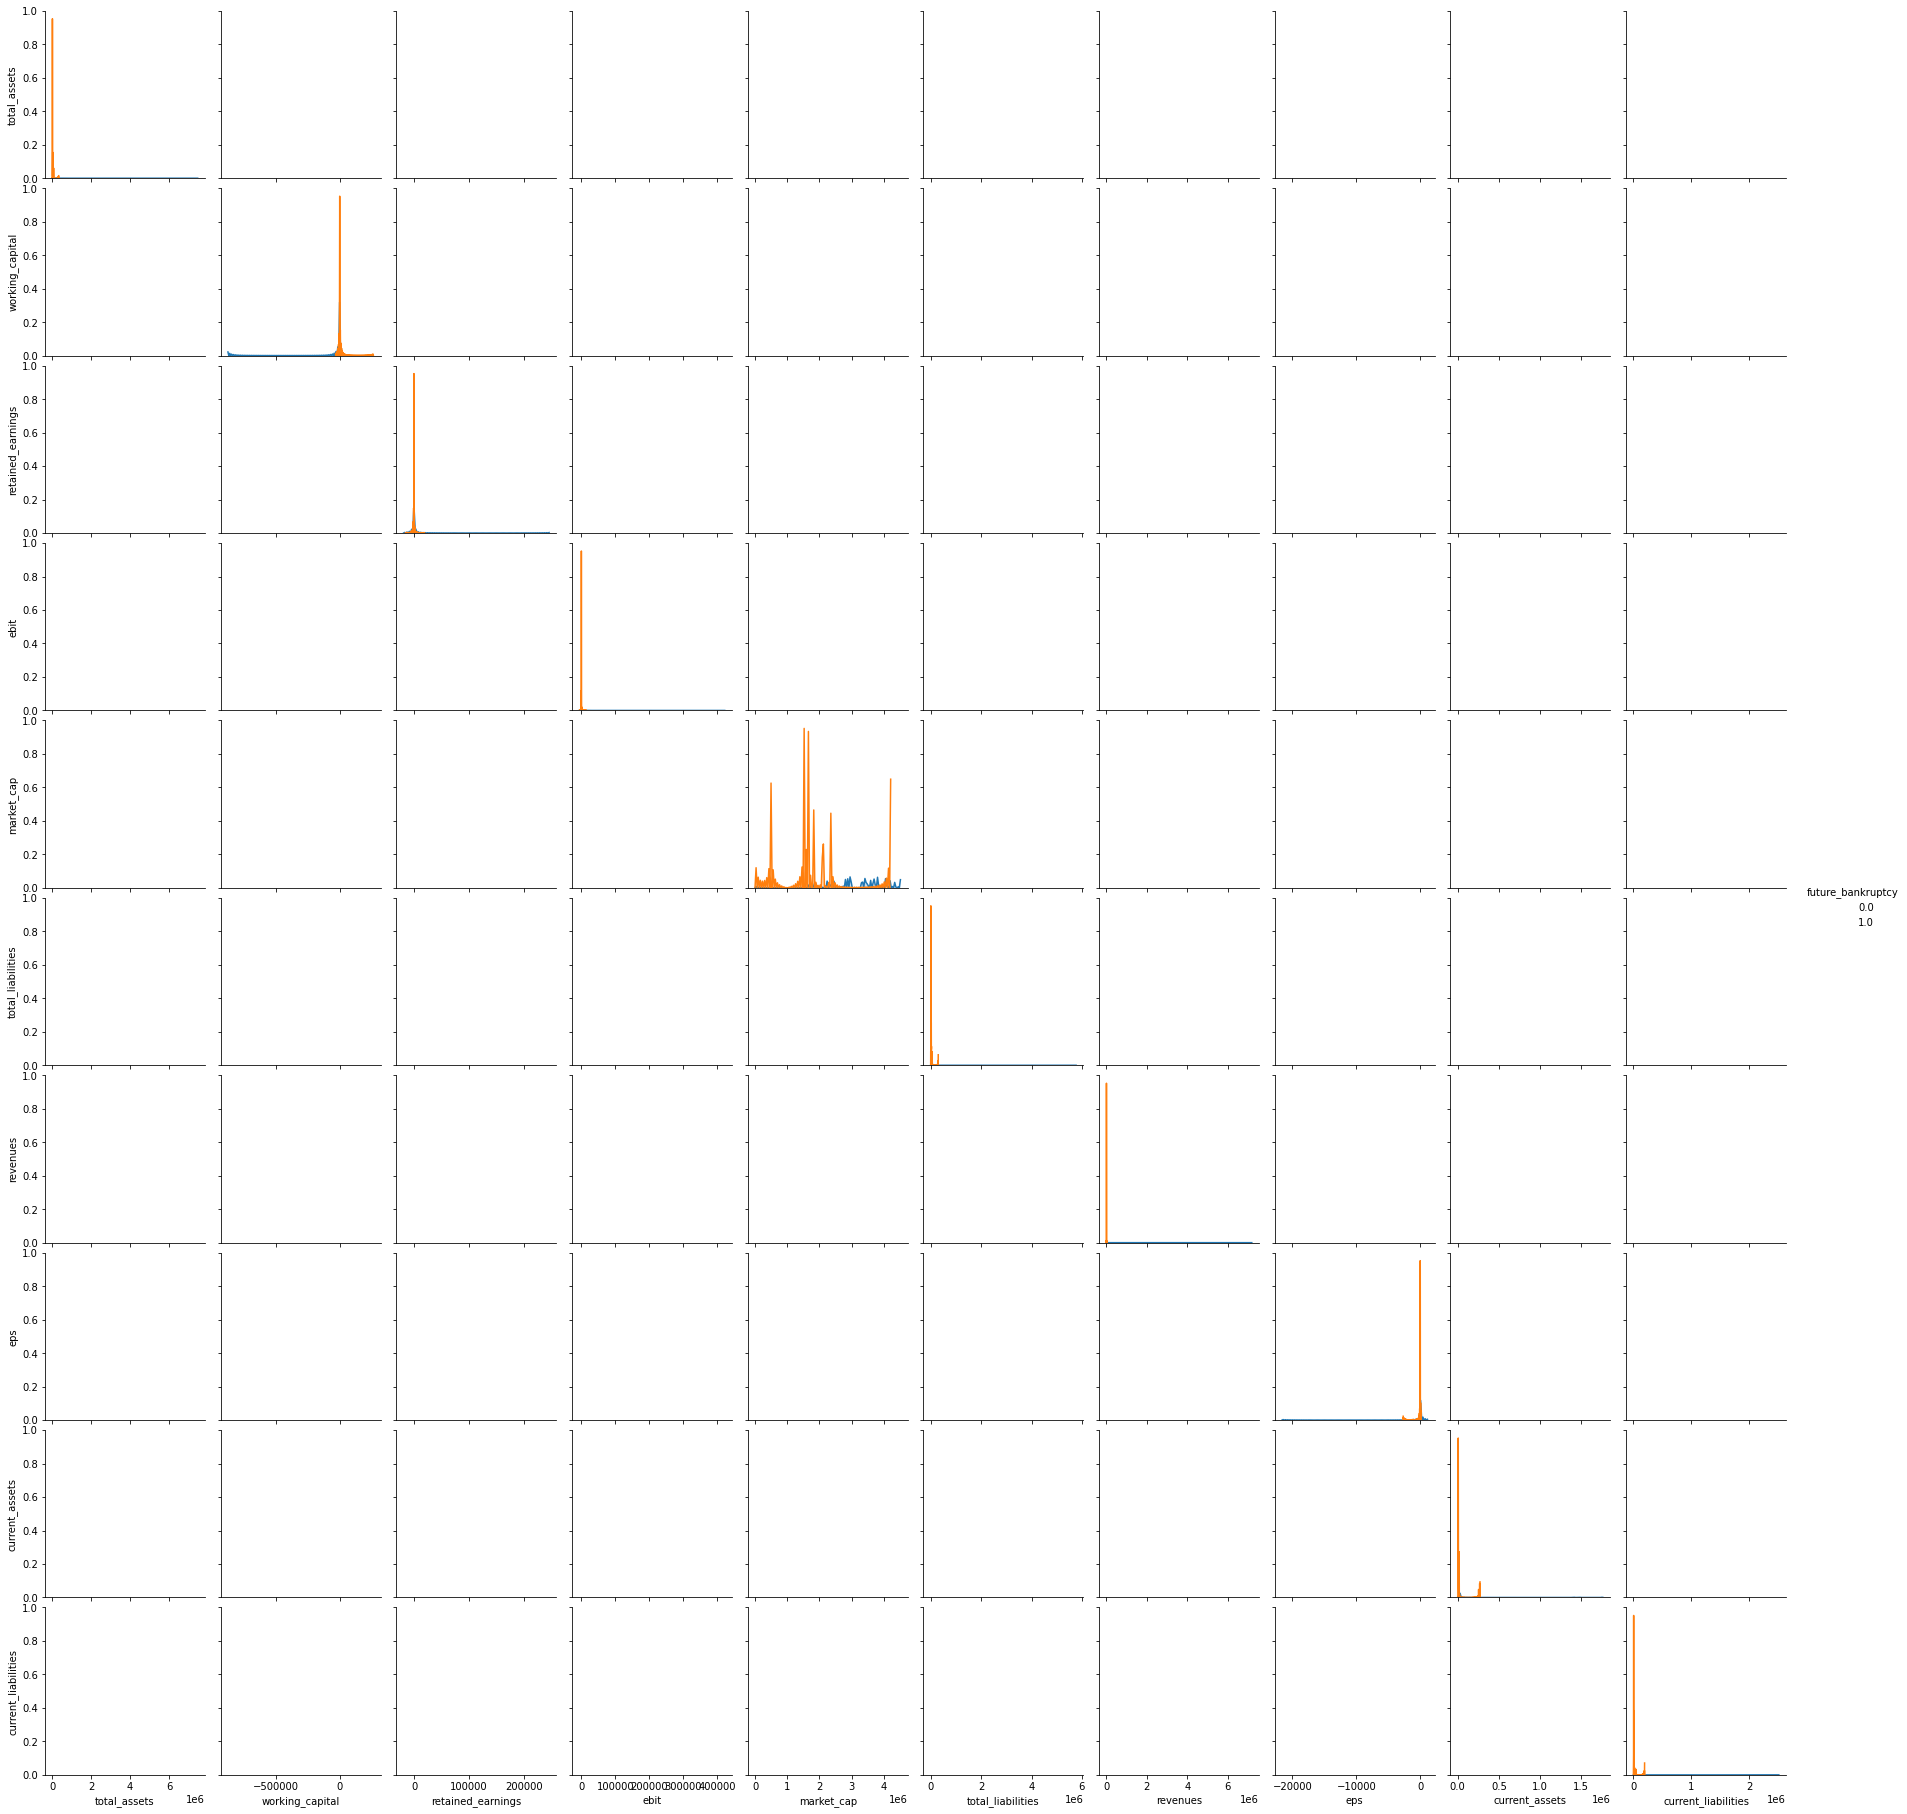

In [19]:
features_list = DATASET2_FEATURES.copy()
features_list.append('future_bankruptcy')
features_list.remove('sector_num')
features_list.remove('sector_txt')

sns.pairplot(data_flat[features_list],kind='kde', hue = 'future_bankruptcy');

### 6.2 Remove Outliers

As we saw in the describe table, we can get no information from the data as is, which means we have a lot of cleaning to do. Because the data is highly skewed and different features have different distributions, we decided to manually clean the data. We created a custom plot to help us with the job.

We will set a mask string for each feature, and group them all together in the end.

Below are examples of how we did it for the features total_assets and working_capital. We will iterate the same process for all features (Zero found to be missing data on some features so we will remove it)

We want to preserve as many datapoints as possible on one hand and avoid heavy outliers on the other hand.

In [20]:
# Custum plot function:

def plot_outlier(feature, mask_str):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.hist(data_flat[feature], bins=50)
    plt.subplot(122)
    plt.hist(data_flat.query(mask_str)[feature],bins=50)
    plt.suptitle(feature)
    #plt.show()

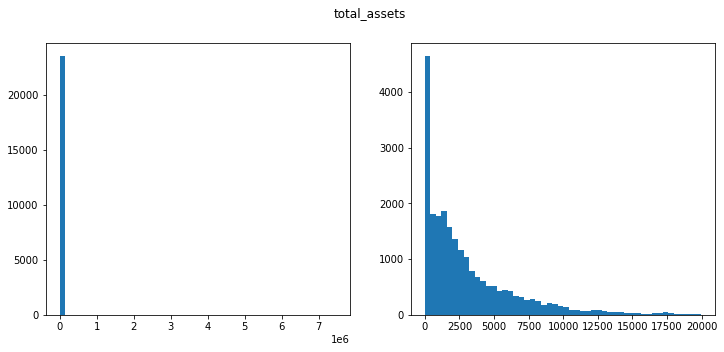

In [21]:
# total_assets

plot_outlier('total_assets', 'total_assets < 20000')

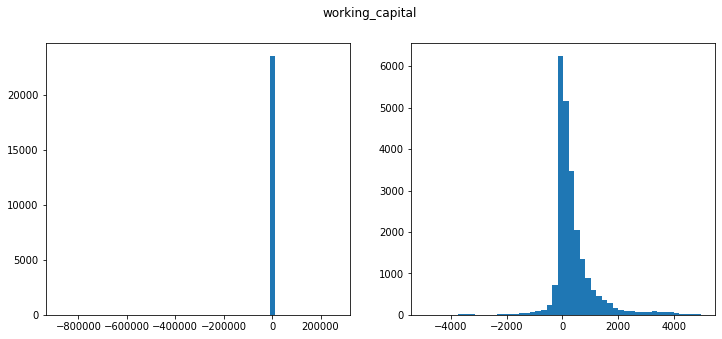

In [22]:
# working_capital

plot_outlier('working_capital', '-5000 < working_capital < 5000')

This is the final result of removing all the outliers after manually checking the values for all the features.

In [23]:
# Join together all the limits
mask = data_flat.eval("total_assets < 20000 and \
                       working_capital > -5000 and \
                       working_capital< 5000 and \
                       retained_earnings > -7000 and \
                       retained_earnings < 5000 and \
                       retained_earnings != 0 and \
                       ebit > -500 and \
                       ebit < 1000 and \
                       total_liabilities > 0 and \
                       total_liabilities < 10000 and \
                       market_cap > 0 and \
                       market_cap < 15000 and \
                       revenues > 0 and \
                       revenues < 15000 and \
                       eps > -50 and \
                       eps < 50 and \
                       current_assets > 0 and \
                       current_assets < 10000 and \
                       current_liabilities > 0 and \
                       current_liabilities < 6000")

# remove points that are not in the mask
data_flat = data_flat[mask].copy()

# Save the clean db, rebuild the feature list
features_list = DATASET2_FEATURES.copy()
features_list.append('future_bankruptcy')

db_2yr_final = data_flat.set_index(['Symbol','Date'])[features_list]
# db_2yr_final.head()

### Final cleaning results

Here is a scatter/kde plot of the points after we cleaned the data.

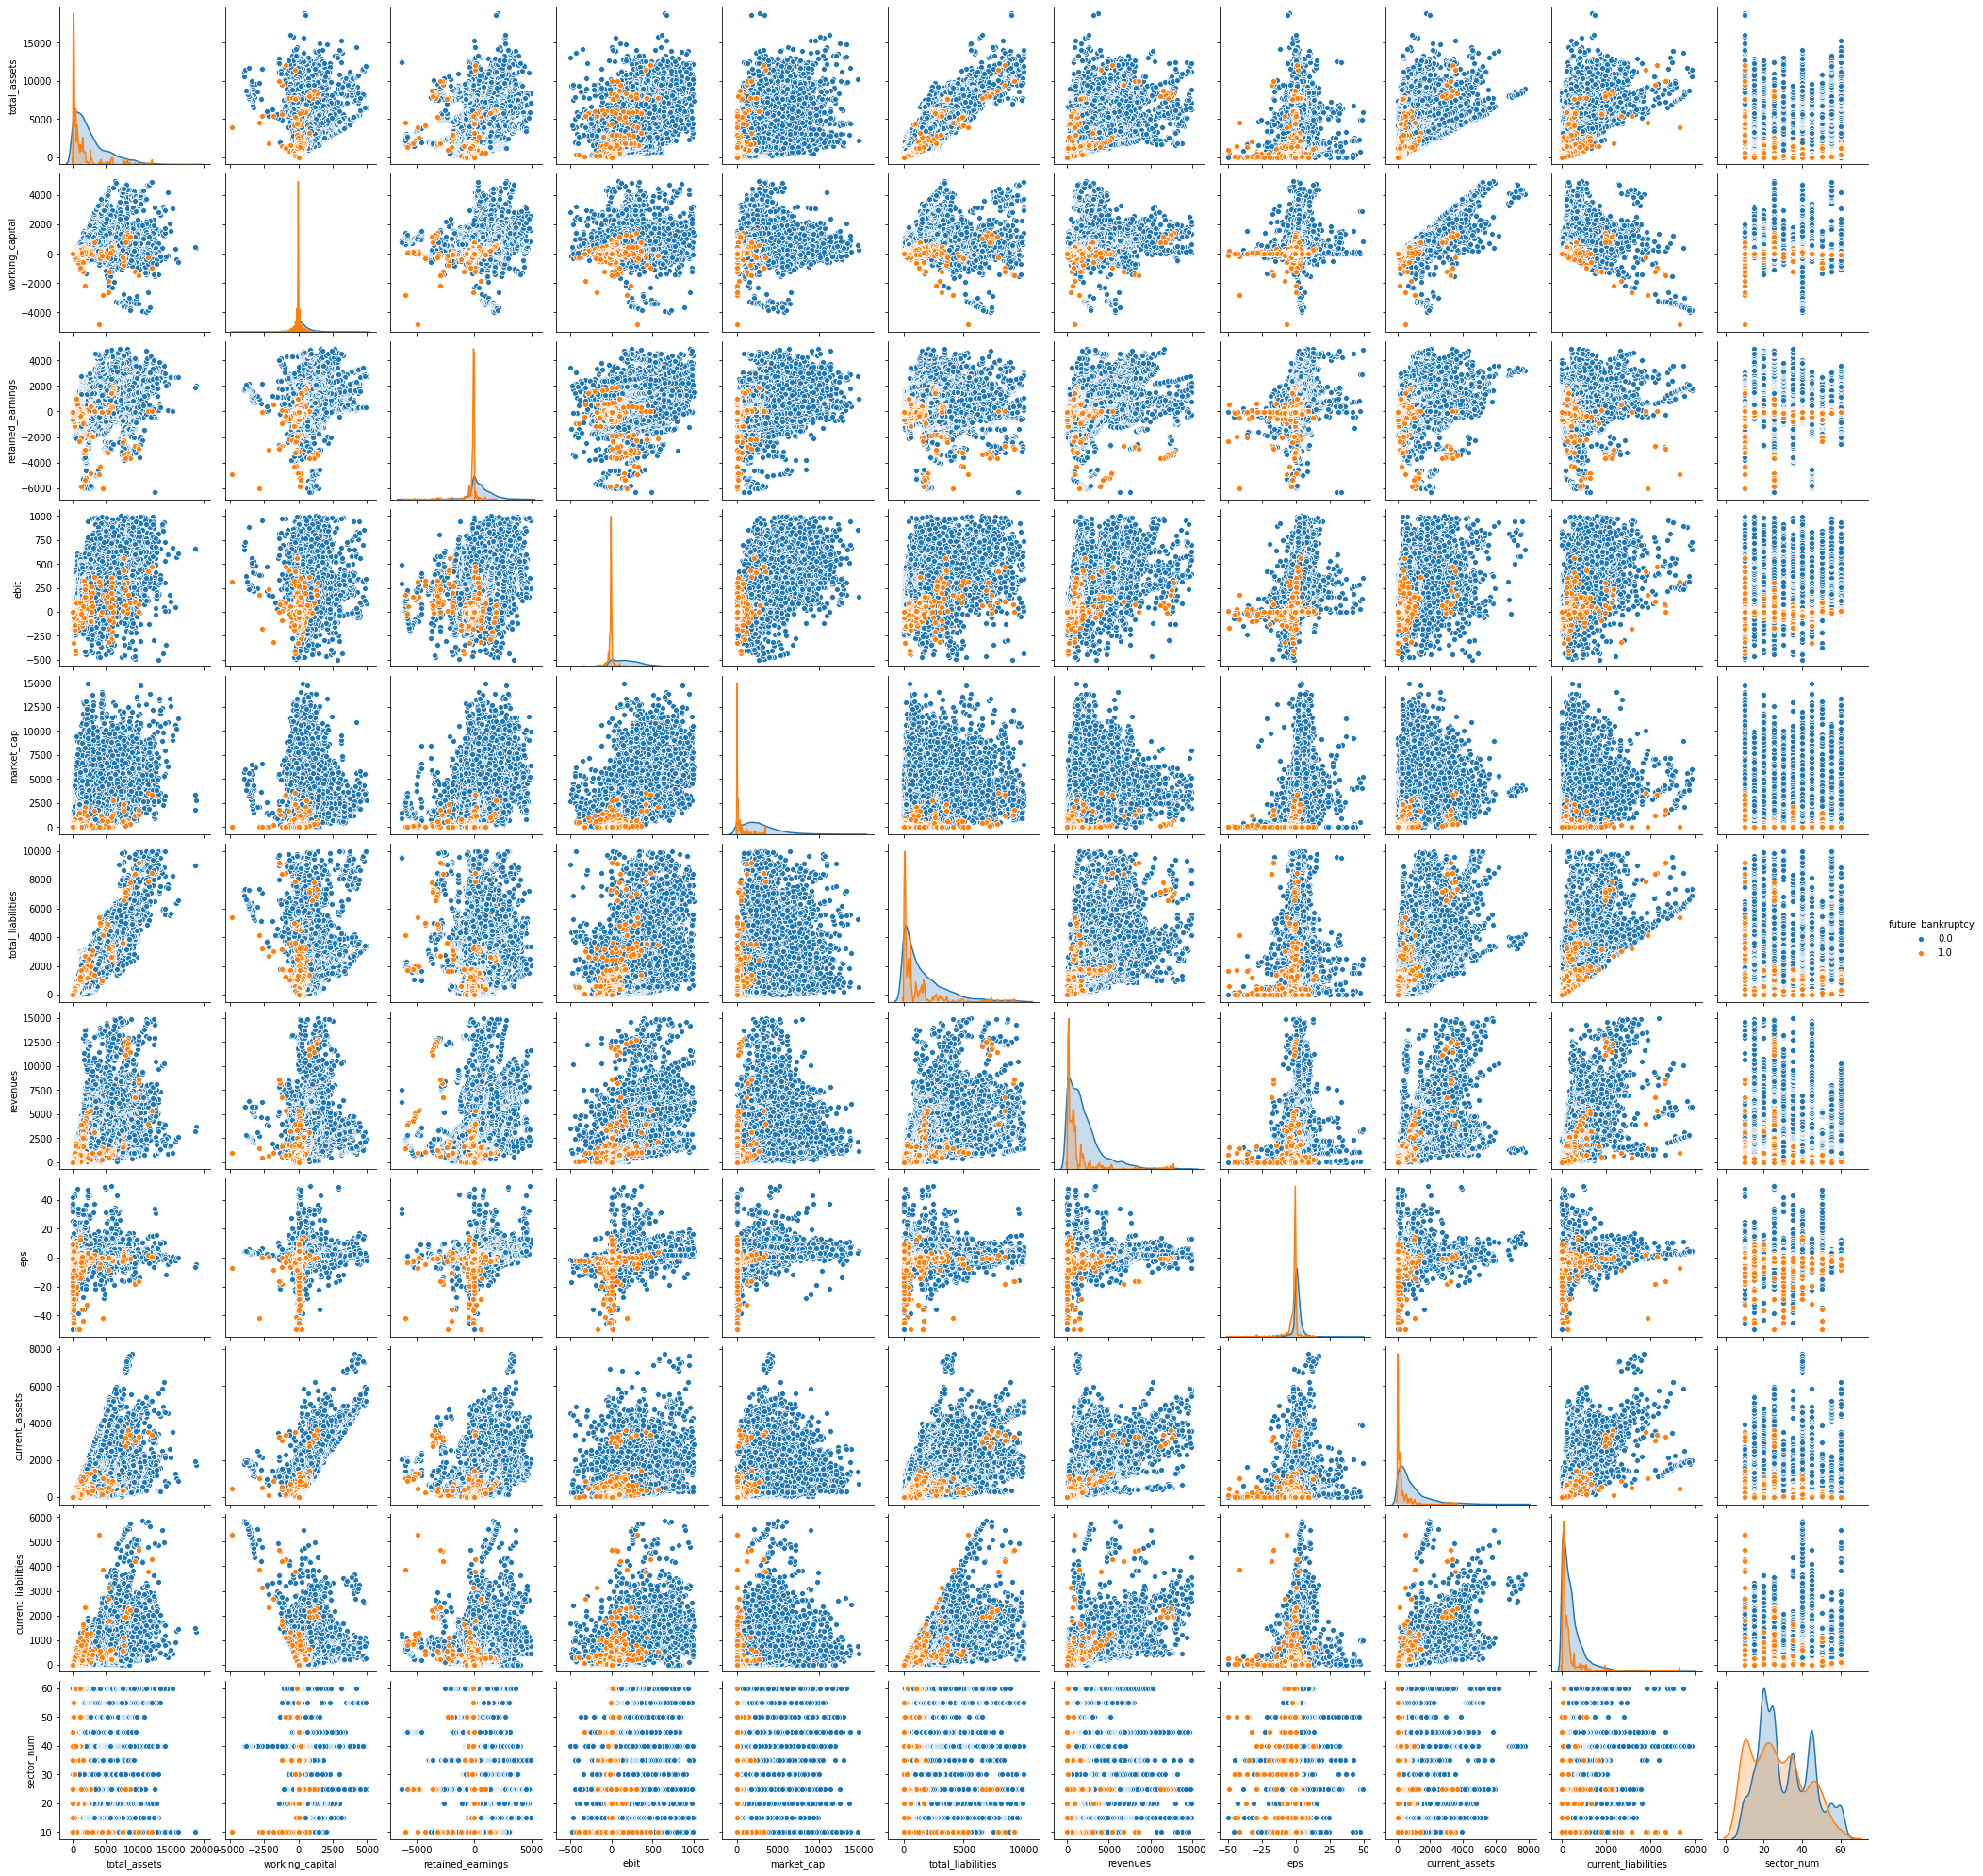

In [25]:
sns.pairplot(data_flat[features_list], hue='future_bankruptcy');

### Partial conclusions after the cleaning:

1. We can see now clear areas where the bankruptcies occur. We will have to select the algorithms that will maximize the final result.
    
2. We can also see that the bankruptcies do not behave the same for all sectors, which means it is a key feature that will help us later.

### 6.3 Dig deeper into the data

In this section we will do the following:
1. Bankruptcy counts for each Sector
2. Correlation matrix
3. Feature reduction
4. Inside sector scatter

#### 6.3.1. Bankruptcy counts for each Sector

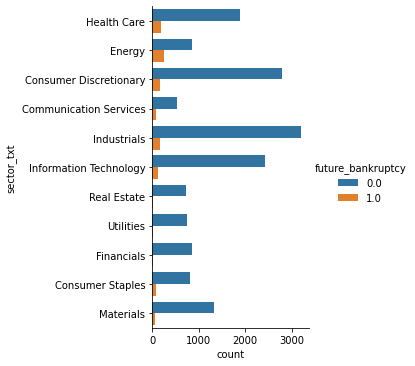

In [26]:
sns.catplot(y='sector_txt',
            kind='count',
            data = data_flat,
            hue='future_bankruptcy');

#### 6.3.2 Correlation matrix

We will add the Altman scores to see if they can help.

In [27]:
# Add Altman scores
data_flat.eval('altman_z_score = 1.2 * (working_capital/total_assets) + \
           1.4 * (retained_earnings/total_assets) + \
           3.3 * (ebit/total_assets) + \
           0.6 * (market_cap/total_liabilities) + \
           (revenues/total_assets)', inplace = True)
data_flat.eval('altman_z_two_tag_score = 6.56 * (working_capital/total_assets) + \
           3.26 * (retained_earnings/total_assets) + \
           6.72 * (ebit/total_assets) + \
           1.05 * (market_cap/total_liabilities)', inplace = True)

real_features = ['total_assets', 'working_capital', 'retained_earnings', 'ebit',
                'total_liabilities', 'market_cap', 'revenues', 'eps', 'current_assets',
                'current_liabilities', 'altman_z_two_tag_score', 'future_bankruptcy', 'altman_z_score']

data_flat[real_features].corr().style.background_gradient(cmap='coolwarm')

In the Confusion Matrix we can see that, most of the features have low correlation to each other. We can also see that the two Altman scores has low correlation to future bankruptcy but high correlation to each other.

#### 6.3.3 Feature reduction

The correlation matrix can help us with the removal of features that are highly correlated. Some models, especially linear ones might get poor results due to multicollinearity.

In [28]:
max_correl = 0.75

# Create correlation matrix
correl_mat = data_flat[real_features].corr().abs()

# Select upper triangle of correlation matrix
upper = correl_mat.where(np.triu(np.ones(correl_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than max_correl
to_drop = [column for column in upper.columns if any(upper[column] > max_correl)]
to_drop

['total_liabilities', 'current_assets', 'altman_z_score']

We can see from the correlation matrix that:
1. total_liabilities is highly correlated to total_assets.
2. current_assets is highly correlated to working_capital.
3. altman_z_score is highly correlated to altman_z_two_tag_score

We will keep note of this when we choose features in the following sections.

#### 6.3.4 Inner sector scatter

Here we can see the pairplot for the real estate sector. The real estate sector has distinct feature dispersion, we could probably use the features as is.

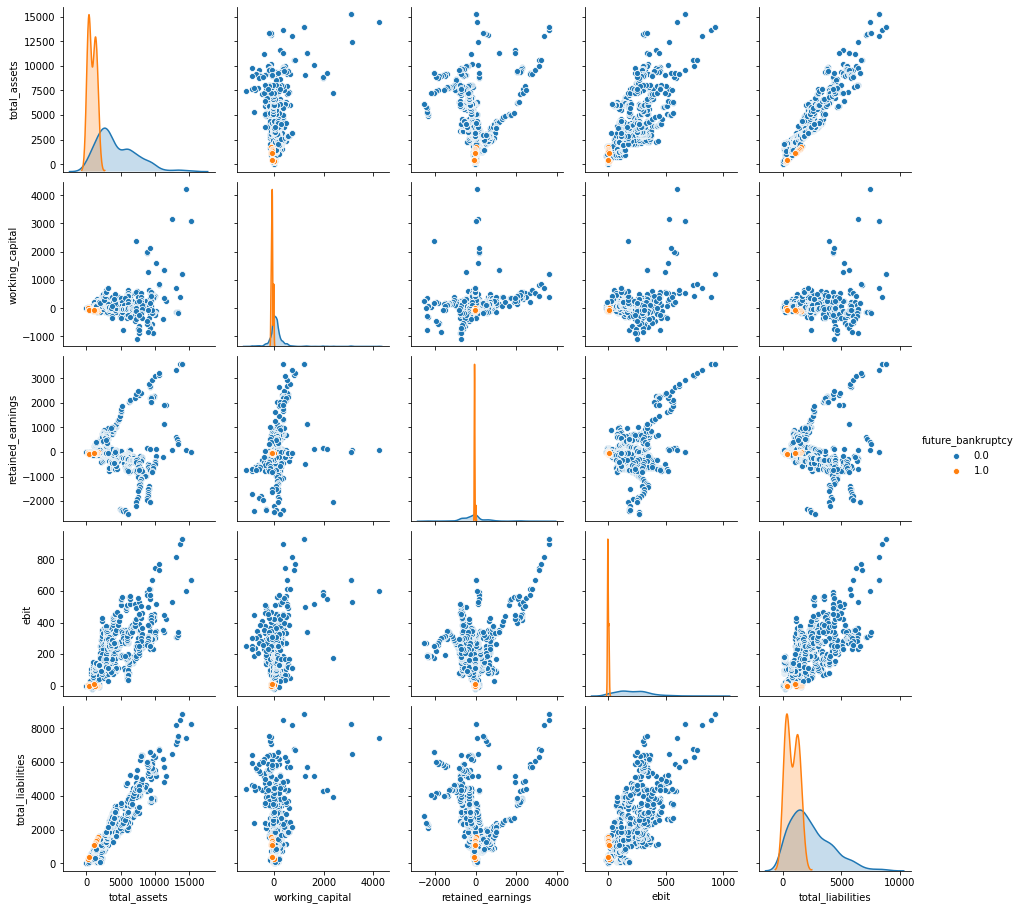

In [29]:
# Real Estate

sns.pairplot(data_flat.query('sector_num==60')[['total_assets', 'working_capital',
       'retained_earnings', 'ebit', 'total_liabilities','future_bankruptcy']], hue='future_bankruptcy');

This is the pairplot for the Energy sector. 
In the Energy sector the values are widely dispersed, we will need some tricks to get better results

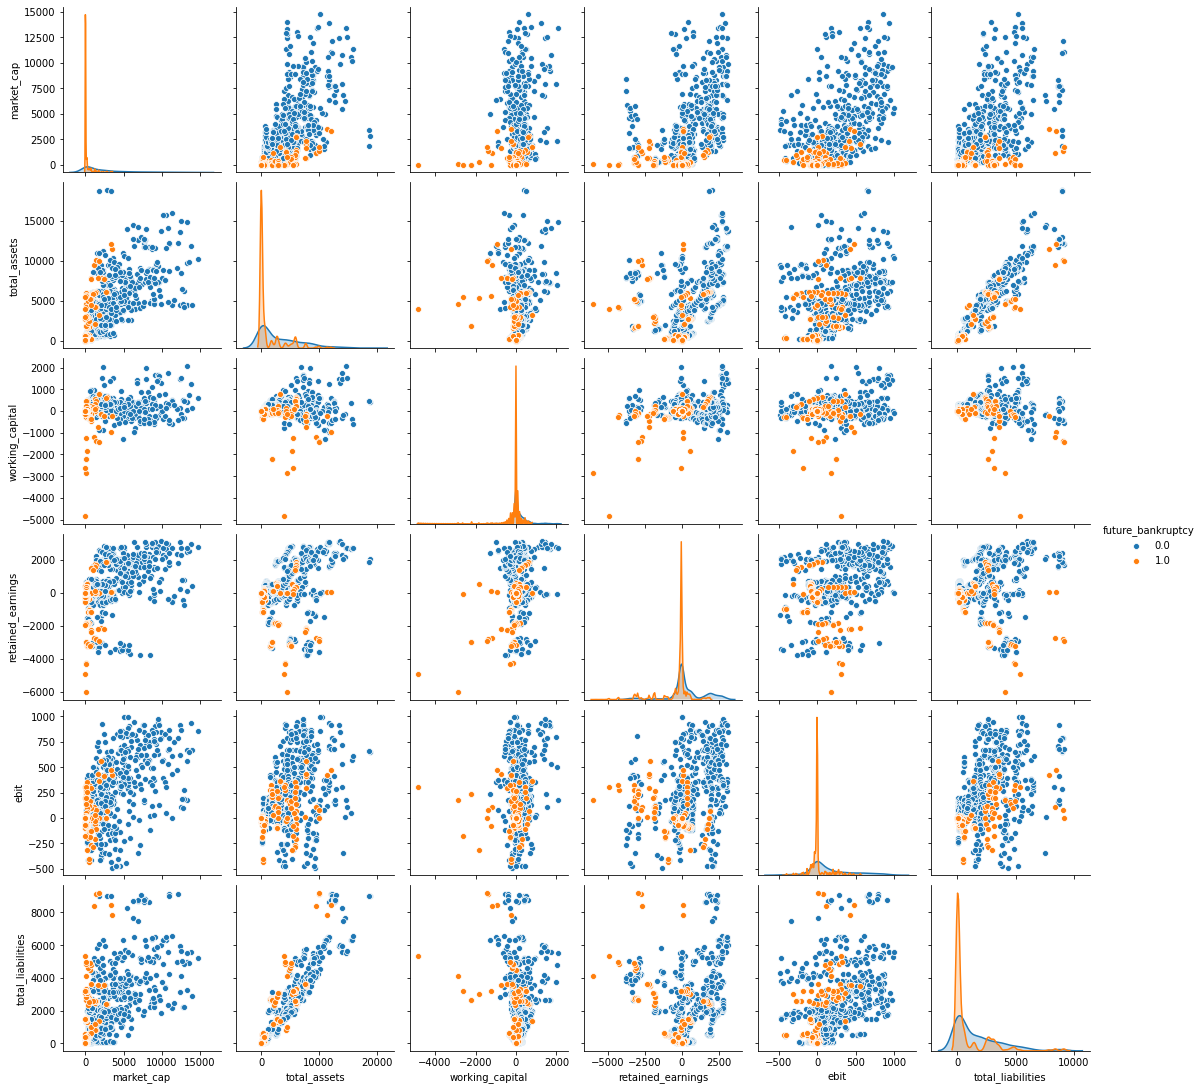

In [30]:
# Energy sector

sns.pairplot(data_flat.query('sector_num==10')[['market_cap','total_assets', 'working_capital',
       'retained_earnings', 'ebit', 'total_liabilities','future_bankruptcy']], hue='future_bankruptcy');

### 6.4 Create composite features

We will add some composite features that might help us.

In [31]:
def add_composite_features(database, add_div=True):
    result = database.copy()
    real_features = ['total_assets', 'working_capital', 'retained_earnings', 'ebit',
                    'total_liabilities', 'market_cap', 'revenues', 'eps',
                    'current_assets', 'current_liabilities']

    features_comb = list(it.combinations(real_features,2))
    for f in features_comb:
        a = f[0]
        b = f[1]

        result[a+'_mul_'+b] = result[a]*result[b]
        if add_div:
            result[a+'_div_'+b] = result[a]/result[b]
    return result

data_flat = add_composite_features(data_flat)

We will look at the mul and div columns for the energy sector to see if there are any advantages

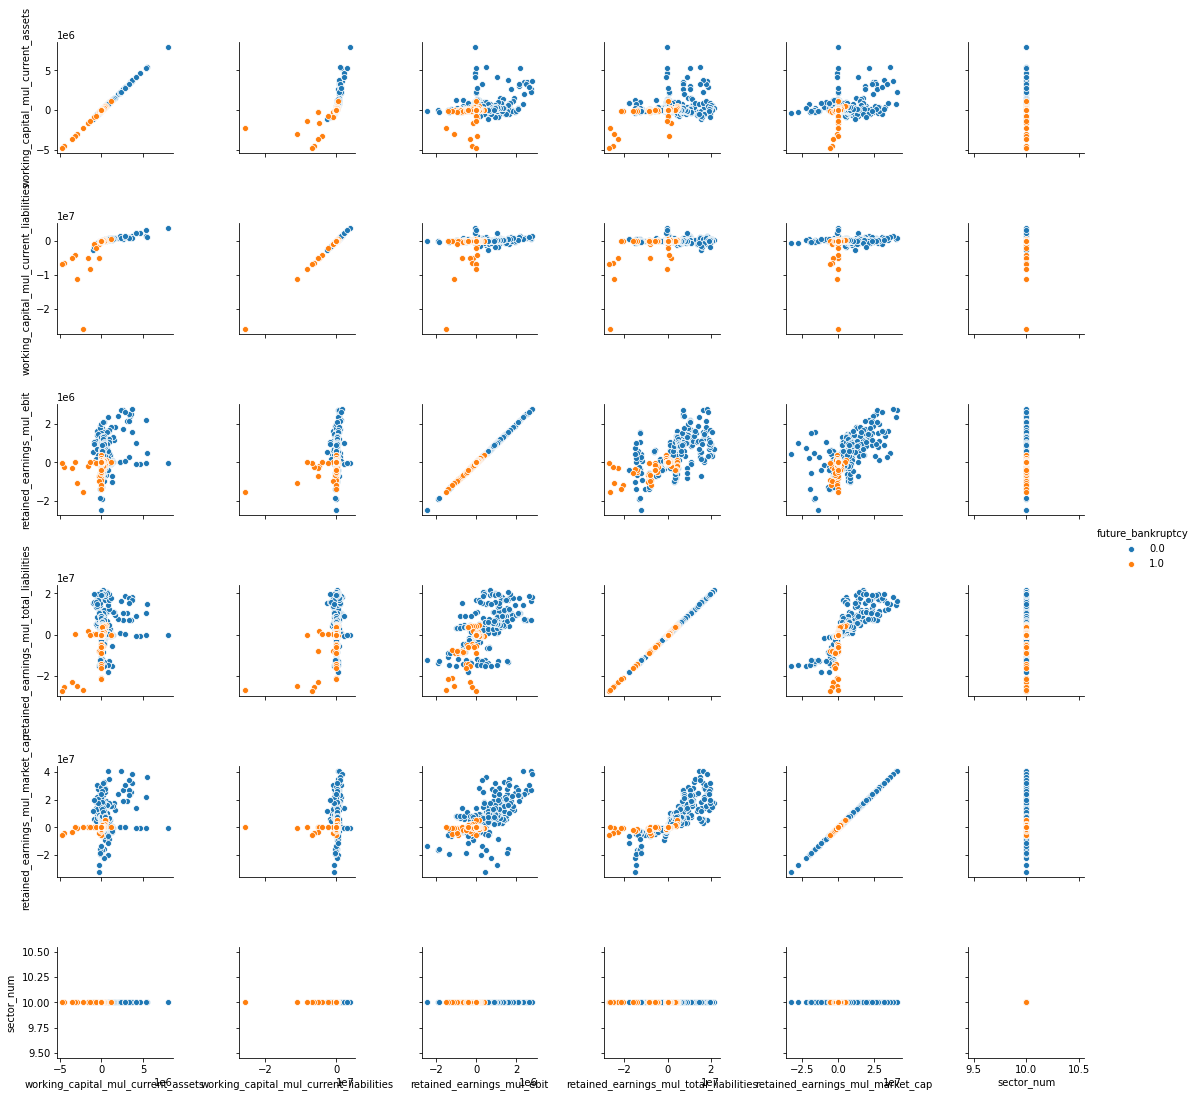

In [32]:
# Energy sector in mul colunns

col_mask = np.concatenate( (data_flat.columns[data_flat.columns.str.contains('_mul_')].values[15:20] ,['sector_num', 'future_bankruptcy']) )
sns.pairplot(data_flat[col_mask].query('sector_num==10'), diag_kind = None, hue='future_bankruptcy');

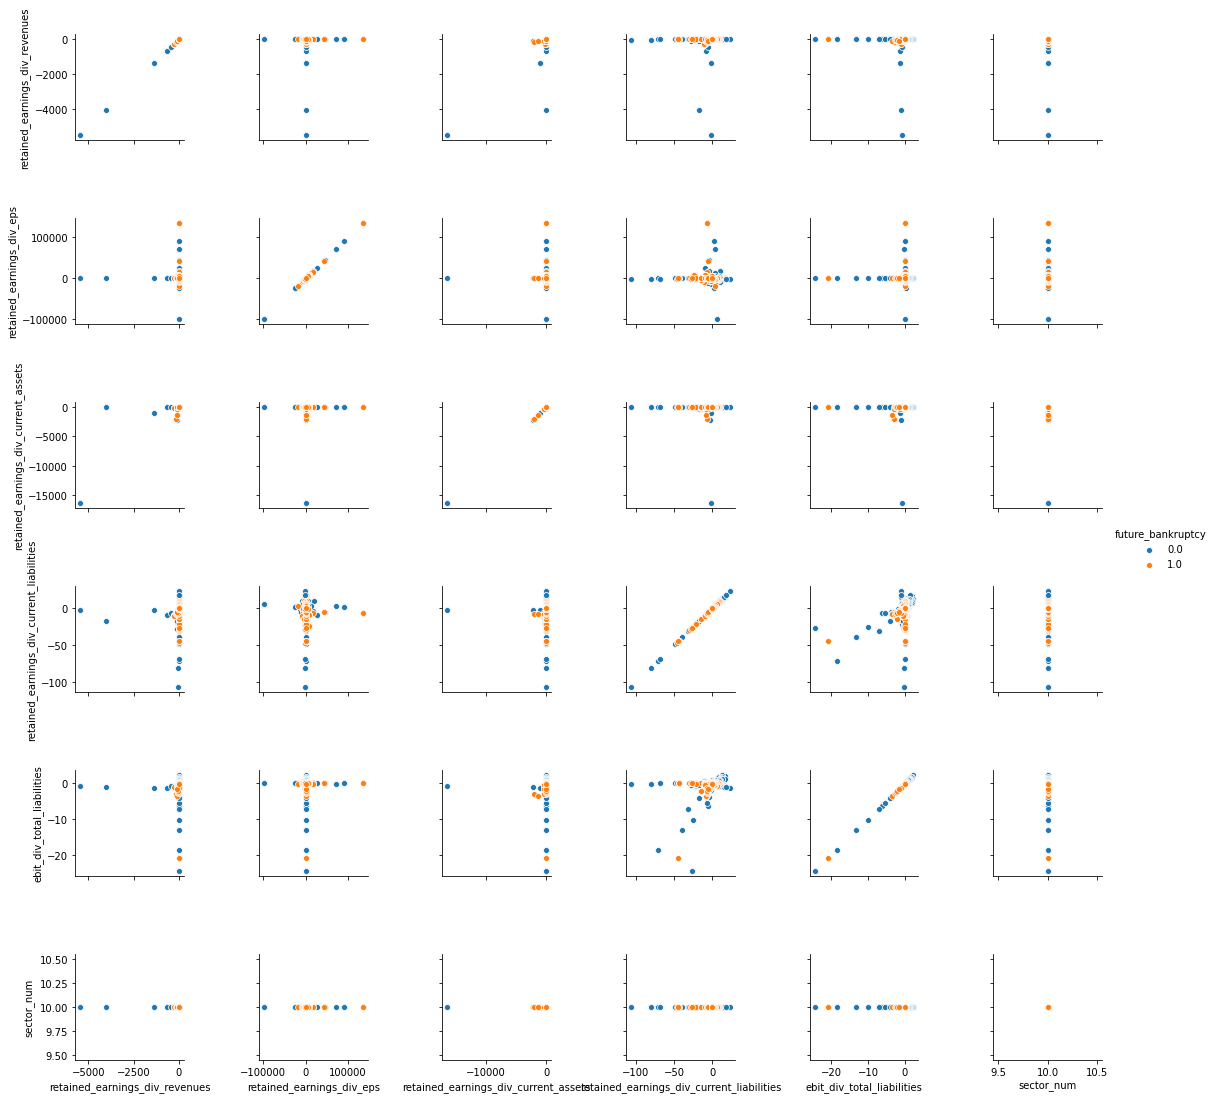

In [33]:
# Energy sector in div colunns

col_mask = np.concatenate( (data_flat.columns[data_flat.columns.str.contains('_div_')].values[20:25] ,['sector_num', 'future_bankruptcy']) )
sns.pairplot(data_flat[col_mask].query('sector_num==10'), diag_kind = None, hue='future_bankruptcy');

We can see in the "mul" and "div" features that we might get better separation where bankruptcies occur. There are areas in those features that might be easy for some models to classify.

### 6.5 Final conclusions

1. We can see now clear areas where the bankruptcies occur. We will have to select the algorithms that will maximize the final result.
    
2. We can also see that the bankruptcies do not behave the same for all sectors, which means it is a key feature that will help us later.

3. The future bankruptcy is unbalanced. This means we will have to weigh out the models (and possibly the scoring) to get better results.

4. Most of the features have low correlations, which is good for us.

5. We can see the total_assets and total_liabilities are highly correlated. One of them might be removed in some models in order to avoid collinearity problems.

6. Altman's scores have low correlation to bankruptcies, they might not help us.

7. Composite features might help us with sectors like Energy.

## 7. Models

### 7.1 Model Comparison Metric

In the next sections we will build various models. Our ultimate goal is to try to compare the performance of the different models. A question that arises is what is the best way of going about doing this. There are a few different options for comparing models. We could use the accuracy or the F1-Score of the models, but they aren't very good since they depend on a threshold we choose to classify a bankruptcy. A better metric is to use the "receiver operating characteristic" (ROC) curve.  

A ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The "area under the curve" (AUC) is a good metric to determining how good a model is. The closer the AUC score is to the value of one the better the model. The AUC is independent of any threshold. That is why we chose to use it to compare between models. To make the metric reliable, we will calculate it with the results of the models running on the same test set.

For all the models we will also be recording the accuracy, F1-score and confusion matrix to get further insights, but the will not be our main metric.

### 7.2 Models on Dataset 1

We are now ready to create the dataset we will be using. Creating the datasets from the database is easy. It is just choosing the correct columns from the database. We will also keep the index columns (Symbol and Date) since we use them in order to create the training, validation and test set split. 

We are now ready to create the dataset we will be using. Creating the datasets from the database is easy. It is just choosing the correct columns from the database. We will also keep the index columns (Symbol and Date) since we use them in order to create the training, validation and test set split. We will start with the first dataset. The first dataset uses a two year forward forecast for the labels. The features for the first dataset are:
1. Total assets
2. Working capitol 
3. Retained earnings 
4. Earnings before interest and taxes (EBIT)
5. Market capitalization 
6. Total liabilities  
7. Revenues

In [34]:
tmp = DATASET1_FEATURES.copy()
tmp.append('future_bankruptcy')
dataset1 = db_2yr_final[tmp].copy()
# dataset1

The second dataset include the following features:
1. Total assets
2. Working capitol 
3. Retained earnings 
4. Earnings before interest and taxes (EBIT)
5. Market capitalization 
6. Total liabilities  
7. Revenues
8. EPS
9. Current assets
10. Current liabilities
11. Sector_num
12. Sector_txt
13. One-hot encoding for all sectors

In [35]:
tmp = DATASET2_FEATURES.copy()
tmp.append('future_bankruptcy')
dataset2 = db_2yr_final[tmp].copy()

# dataset2

We will create a one-hot encoding for the sectors.

In [36]:
dummy_sectors = pd.get_dummies(dataset2.sector_txt)
dataset2 = dataset2.join(dummy_sectors)
# dataset2.columns.values

### 7.3 Models on Dataset 1

The purpose of this section is to try to build models that use the same features that Altman's Z-scores use. Dataset 1 only contains features used in Altman's Z-Scores and the time to bankruptcy is within the follow 2 years (which is the time frame for the prediction in the Z-Scores). 

In essence, we want to check if advanced machine learning algorithms can outperform what Altman was able to achieve. To be fair we are teaching the new models on more UpToDate data than what Altman used when he created the various Z-Scores, which will probably have an effect on the predictive of the models we will create. We will train and compare several different models. As stated above these are the models we will be testing:
1. Altman's Z-Score
2. Altman's Z''-Score
3. Logistic Regression
4. Decision Tree
5. SVM
6. Neural network

In order to better help us build the models we will do some preliminary work on the dataset. 

We may want to use the same ratios that appear in Altman Z-scores to train various models. So, it will be useful if we calculated them once and add them to the dataset1 dataframe. 

The ratios are as follows:
$$X_1 =\frac{working\ capital}{total\ assets}
;X_2 =\frac{retained\ earnings}{total\ assets}
;X_3 =\frac{earnings\ before\ interest\ and\ taxes}{total\ assets}
;X_4 =\frac{market\ value\ of\ equity}{total\ liabilities};$$
$$X_5 =\frac{sales}{total\ assets}$$

In [37]:
dataset1.eval('X1 = working_capital/total_assets', inplace = True)
dataset1.eval('X2 = retained_earnings/total_assets', inplace = True)
dataset1.eval('X3 = ebit/total_assets', inplace = True)
dataset1.eval('X4 = market_cap/total_liabilities', inplace = True)
dataset1.eval('X5 = revenues/total_assets', inplace = True)

dataset1['X1'] = dataset1['X1'].astype(float, errors='raise') # Force float
dataset1['X2'] = dataset1['X2'].astype(float, errors='raise') # Force float
dataset1['X3'] = dataset1['X3'].astype(float, errors='raise') # Force float
dataset1['X4'] = dataset1['X4'].astype(float, errors='raise') # Force float
dataset1['X5'] = dataset1['X5'].astype(float, errors='raise') # Force float

We will split the dataset into training and test sets.

In [38]:
train_set1, test_set1 = split_train_test(dataset1, 0.7)

Some models are trained best when we use normalized values of the features. This is because their learning algorithms take into account the Euclidean distance. That is why we will also add the normalized value of the features. To be more exact we will be doing standardization (Z-Score Normalization).

Since we split the training set and test set according to different periods, and the stock market distributions potentially can change over time, we must be careful when doing the normalization. We will normalize the data according to the values of the training set. We will then use these values to normalize the both the training and test set.


In [39]:
scaling = StandardScaler()

scaling.fit(train_set1[DATASET1_FEATURES]);

# scaling.mean_
# scaling.var_

In [40]:
train_set1 = train_set1.reindex(columns=train_set1.columns.tolist() + DATASET1_FEATURES_NORM)
test_set1 = test_set1.reindex(columns=test_set1.columns.tolist() + DATASET1_FEATURES_NORM)

train_set1[DATASET1_FEATURES_NORM] = scaling.transform(train_set1[DATASET1_FEATURES])
test_set1[DATASET1_FEATURES_NORM] = scaling.transform(test_set1[DATASET1_FEATURES])

In [41]:
# train_set1[DATASET1_FEATURES_NORM].mean(axis=0)
# train_set1[DATASET1_FEATURES_NORM].std(axis=0)
# test_set1[DATASET1_FEATURES_NORM].mean(axis=0)
# test_set1[DATASET1_FEATURES_NORM].std(axis=0)

Finally we will create a pandas dataframes where we will store all the metrics we will use compare the different models, and the data needed to plot the ROC curve. 

In [42]:
set1_metrics = pd.DataFrame(columns=['Model', 'accuracy', 'f1', 'auc', 'conf_matrix']).set_index('Model')
set1_ROC_curve_df = pd.DataFrame(columns=['Model', 'fpr', 'tpr', 'auc']).set_index('Model')

We will add a few functions that will use later to help us throughout this, and the following sections.

The first function plot_ROC plots receives a dataframe with all the data needed in order to plot the ROC curve. The function plots the ROC curve. If the dataframe has a few rows for different models, then the function will plot all the values in the same graph.

In [43]:
## TAKE FINAL VERSION FROM UTILS.PY

# from sklearn import metrics

def plot_ROC(ROC_curve_df):
    
    for index, row in ROC_curve_df.iterrows():
        model_name = index
        fpr = row['fpr']
        tpr = row['tpr']
        auc = row['auc']
        plt.plot(fpr, tpr, label='%s (AUC = %0.3f)' % (model_name, auc))
    
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend();

The next function show_results takes the results from a particular model, calculates a few key metrics and displays them together with the ROC graph for the model. The function takes as input the model_name, y_true which contains the true values (of the test set), the model predicted values (results), and the probability of the result (results_proba). The function returns two dataframes, one for the metrics and the other the ROC curve (that holds all the information needed to build the ROC graph). Note that for the F1 and AUC we used the weighted option since our dataset is unbalanced.

In [44]:
## TAKE FINAL VERSION FROM UTILS.PY

def show_results(model_name, y_true, results, results_proba):
    
    accuracy = skm.accuracy_score(y_true, results)
    f1 = skm.f1_score(y_true, results, average='weighted')
    auc = skm.roc_auc_score(y_true, results_proba, average='weighted')
    conf_matrix = skm.confusion_matrix(y_true, results)
    
    fpr, tpr, _ = skm.roc_curve(y_true, results_proba)
    
    metrics_df = pd.DataFrame({'Model': [model_name], 'accuracy': [accuracy], 'f1': [f1], 'auc': [auc], 'conf_matrix': [conf_matrix]}).set_index('Model')
    ROC_curve_df = pd.DataFrame({'Model': [model_name], 'fpr': [fpr], 'tpr': [tpr], 'auc': [auc]}).set_index('Model')

    print('Accuracy: ', '%.3f' % accuracy )
    print('F1-score: ', '%.3f' % f1 )
    print('AUC score: ', '%.3f' % auc )
    print('\nConfusion Matrix: \n\n', pd.crosstab(y_true, results))
    plot_ROC(ROC_curve_df)
    return metrics_df, ROC_curve_df

#### 7.3.1 Altman's Z-Score and Z"-Score

#### Analyzing the Z-Score

We are using Altman's Z-Scores as our baseline models, but they are a little different than the other models. First off, the formulas are given for the Z-Scores and don't need to be learnt. Also, as opposed to the other models, where the output gives the probability a company will declare bankruptcy in the next two years, the Z-Score give a range of values and not an actual probability. For instance, for the first Z-Score, a value of below 1.8 means that a company will declare bankruptcy, a value of above 3 means the company will not and the values in between are considered the gray zone.

A question that arises is how to we decide a value for the cutoff? A single value that separates between predicting bankruptcy or not. This value is not very important for comparing between models since we use the AUC. It does become important for finding the accuracy of the model, F1-score and confusion matrix. 

In order to choose a good value, we will do some analysis on the Z-Scores of the training data. After choosing this value we will use it on evaluating the accuracy, F1-score and confusion matrix on the test data.

This will also give a chance to do a little more analysis on the data and get some more insights into the Z-Scores.

Here is a reminder of Alman's Z-Score equation:
$$Z = 1.2X_1 + 1.4X_2 + 3.3X_3 + 0.6X_4 + 1.0X_5$$

The Z''-Score is supposed to give better results for our dataset. 

A reminder of the Z''-Score formula:

$$Z'' = 6.56X_1 + 3.26X_2 + 6.72X_3 + 1.05X_4$$

We will calculate the Z-Scores for each line in our dataset

In [45]:
X_train = train_set1
X_test = test_set1

y_test = test_set1['future_bankruptcy']
y_train = train_set1['future_bankruptcy']

In [46]:
# Z-Score calculation
X_train.eval('altman_z_score = 1.2 * X1 + 1.4 * X2 + 3.3 * X3 + 0.6 * X4 + X5', inplace = True)
X_test.eval('altman_z_score = 1.2 * X1 + 1.4 * X2 + 3.3 * X3 + 0.6 * X4 + X5', inplace = True)

# Z"-Score calculation
X_train.eval('altman_z_two_tag_score = 6.56 * X1 + 3.26 * X2 + 6.72 * X3 + 1.05 * X4', inplace = True)
X_test.eval('altman_z_two_tag_score = 6.56 * X1 + 3.26 * X2 + 6.72 * X3 + 1.05 * X4', inplace = True)

Let's visualize the market cap, Altman Z-Score and future bankruptcy as a function of time for a company we know has declared bankruptcy whose ticker is NasdaqGS:AKRX

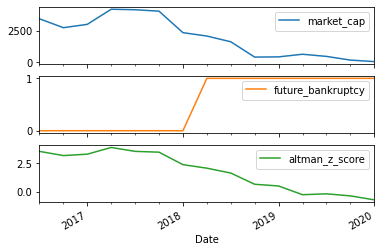

In [47]:
# time series visualisation
stock = 'NasdaqGS:AKRX'
test_set1.loc[stock][['market_cap', 'future_bankruptcy', 'altman_z_score']].plot(subplots=True);

We can see that the Altman Z-Score starts to decline two years before the company declares bankruptcy.

We will do the same for the Z"-Score.

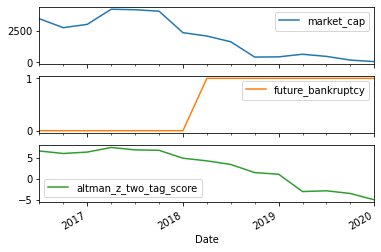

In [48]:
# time series visualisation
stock = 'NasdaqGS:AKRX'
test_set1.loc[stock][['market_cap', 'future_bankruptcy', 'altman_z_two_tag_score']].plot(subplots=True);

We can see that the Z"-Score is very similar in behavior as the Z-Score.

Next, we will look at a histogram of all the Altman scores for all the companies and over all the periods. 

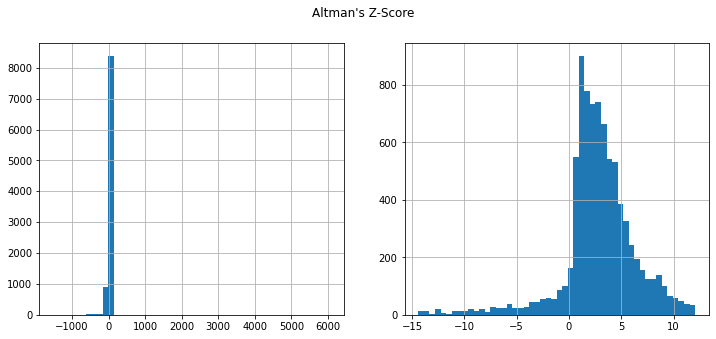

In [49]:
# Altman Z Score histogram, the data is heavily dispersed

plt.figure(figsize=(12, 5))
plt.subplot(121)
X_train.altman_z_score.hist(bins=50);

plt.subplot(122)
# Remove some quantiles
mask = (X_train.altman_z_score>X_train.altman_z_score.quantile(0.05)) & \
       (X_train.altman_z_score<X_train.altman_z_score.quantile(0.95))

X_train[mask].altman_z_score.hist(bins=50);
plt.suptitle("Altman's Z-Score");

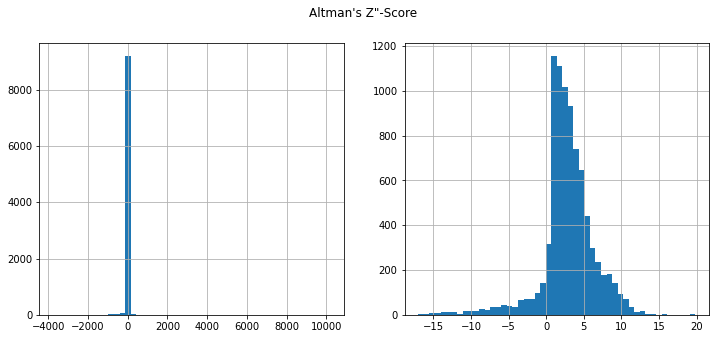

In [50]:
# Altman Z" Score histogram, the data is heavily dispersed

plt.figure(figsize=(12, 5))
plt.subplot(121)
X_train.altman_z_two_tag_score.hist(bins=50);

plt.subplot(122)
# Remove some quantiles
mask = (X_train.altman_z_two_tag_score>X_train.altman_z_two_tag_score.quantile(0.05)) & \
       (X_train.altman_z_two_tag_score<X_train.altman_z_two_tag_score.quantile(0.95))

X_train[mask].altman_z_score.hist(bins=50);
plt.suptitle('Altman\'s Z"-Score');

We can see that the data is heavily dispersed. On left is the histogram of the original Z-Scores. On the right is the histogram of the Z-Scores with the top and bottom 5% quantiles removed.

Next, we will calculate some metrics. We will calculate both the accuracy and the confusion matrix for when the Z-Score is below 1.8. According to the literature that is when a company is in financial strain.

In [51]:
accuracy = skm.accuracy_score(y_train, X_train.altman_z_score < 1.8)

print('For Z-Score and threshold 1.8:\n')
print('Accuracy: ', '%.3f' % accuracy )
print('\nConfusion matrix:')
pd.crosstab(y_train, X_train.altman_z_score<1.8)

For Z-Score and threshold 1.8:

Accuracy:  0.708

Confusion matrix:


altman_z_score     False  True 
future_bankruptcy              
0.0                 5926   2634
1.0                   98    711

We can see that the accuracy isn't very high. As to the confusion matrix, we can see that false positive is reasonable, but the false negative isn't that good.

We will do the same for Z"-Score. This time the threshold for Z" in the literature is 1.1

In [52]:
accuracy = skm.accuracy_score(y_train, X_train.altman_z_two_tag_score<1.1)
print('For Z"-Score and threshold 1.1:')
print('Accuracy: ', '%.3f' % accuracy )
print('\nConfusion matrix:')
pd.crosstab(y_train, X_train.altman_z_two_tag_score<1.1)

For Z"-Score and threshold 1.1:
Accuracy:  0.837

Confusion matrix:


altman_z_two_tag_score  False  True 
future_bankruptcy                   
0.0                      7149   1411
1.0                       116    693

The original Z-Scores talk about ranges not a single threshold. So, if we use 1.8 as our threshold for comparing the first Z-Score to different models we might not get good results. That isn't fair to the Z-Score model. 

That is why we will try to find a better threshold. We will plot the accuracy for different thresholds. The following is a plot for Z-Score

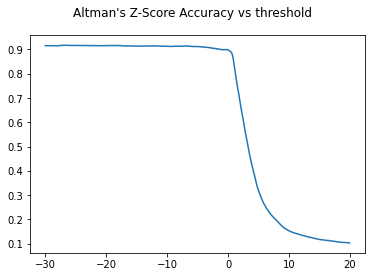

In [53]:
# Search for better threshold the 1.8 found in the literature

accuracy = []
for i in np.arange(-30, 20, 0.05):
    accuracy.append(skm.accuracy_score(X_train.future_bankruptcy==BANKRUPT, X_train.altman_z_score<i))
plt.plot(np.arange(-30, 20, 0.05), accuracy);
plt.suptitle('Altman\'s Z-Score Accuracy vs threshold');

We can see that the accuracy greatly improves if the threshold was lower than 1.8. We see that at around zero the accuracy is really high.

We will do the same for Z"-Score. The theoretical threshold value is 1.1

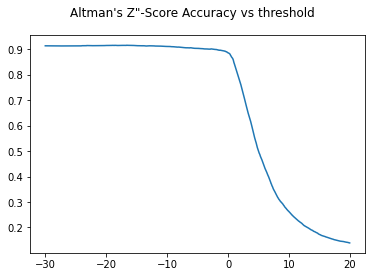

In [54]:
# Search for better threshold the 1.1 found in the literature

accuracy = []
for i in np.arange(-30, 20, 0.05):
    accuracy.append(skm.accuracy_score(X_train.future_bankruptcy==BANKRUPT, X_train.altman_z_two_tag_score<i))
plt.plot(np.arange(-30, 20, 0.05), accuracy);
plt.suptitle('Altman\'s Z"-Score Accuracy vs threshold');

We can see that the accuracy greatly improves if the threshold was lower than 1.1. Again, we see that at around -1 the accuracy is really high.

We will measure the accuracy and confusion matrix for a threshold of 0 for the Z-Score and a threshold of -1 for Z"-Score.

In [55]:
accuracy = skm.accuracy_score(y_train, X_train.altman_z_score < 0)
print('Z-Score threshold 0:')
print('\nAccuracy: %.3f' % accuracy )

print('\nconfusion_matrix:')
pd.crosstab(y_train, X_train.altman_z_score<0)

Z-Score threshold 0:

Accuracy: 0.898

confusion_matrix:


altman_z_score     False  True 
future_bankruptcy              
0.0                 7837    723
1.0                  235    574

In [56]:
accuracy = skm.accuracy_score(y_train, X_train.altman_z_two_tag_score < -1)
print('Z"-Score threshold -1:')
print('\nAccuracy: %.3f' % accuracy )

print('\nconfusion_matrix:')
pd.crosstab(y_train, X_train.altman_z_two_tag_score < -1)

Z"-Score threshold -1:

Accuracy: 0.895

confusion_matrix:


altman_z_two_tag_score  False  True 
future_bankruptcy                   
0.0                      7776    784
1.0                       202    607

We can see that the accuracy is indeed much higher when we change the thresholds. We can also see that the confusion matrix improves.

We know that when it comes to very unbalanced models the accuracy can be misleading and isn't a good indicator of how good a model is. That is why in order to find a better threshold we will look at the F1-Score. We will try to find a good threshold that will maximized the F1-Score. We will do that with the following code.

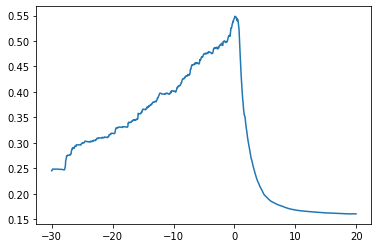

In [57]:
f1 = []
max_f1 = 0
for i in np.arange(-30, 20, 0.05):
    f1_score = skm.f1_score(y_train, X_train.altman_z_score<i) 
    if f1_score > max_f1:
        max_f1 = f1_score
        Z_Score_threshold = i
    f1.append(f1_score)
plt.plot(np.arange(-30, 20, 0.05), f1);

We will print the threshold we found.

In [58]:
print("The threshold for Altman's Z-Score is: %.3f" % Z_Score_threshold)

The threshold for Altman's Z-Score is: 0.100


We do the same for Z"-Score

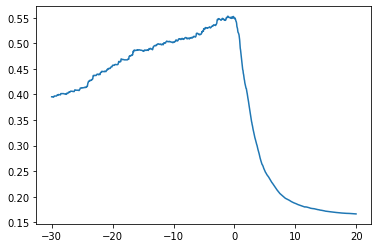

In [59]:
f1 = []
max_f1 = 0
for i in np.arange(-30, 20, 0.05):
    f1_score = skm.f1_score(y_train, X_train.altman_z_two_tag_score<i) 
    if f1_score > max_f1:
        max_f1 = f1_score
        Z_two_tag_Score_threshold = i
    f1.append(f1_score)
plt.plot(np.arange(-30, 20, 0.05), f1);

In [61]:
print('The threshold for Altman\'s Z"-Score is: %.3f' % Z_two_tag_Score_threshold)

The threshold for Altman's Z"-Score is: -1.050


We will find and print the both the accuracy and F1-Score for the 1.8 threshold and the new threshold we found.

In [62]:
accuracy_old_thres = skm.accuracy_score(y_train, X_train.altman_z_score<1.8)
accuracy_new_thres = skm.accuracy_score(y_train, X_train.altman_z_score<Z_Score_threshold)

f1_old_thres = skm.f1_score(y_train, X_train.altman_z_score<1.8)
f1_new_thres = skm.f1_score(y_train, X_train.altman_z_score<Z_Score_threshold)

print("Results for Z-Score:\n")
print("The accuracy for threshold 1.8 is: %.3f" % accuracy_old_thres)
print("The accuracy for new threshold is: %.3f" % accuracy_new_thres)
print("\nThe F1-Score for threshold 1.8 is: %.3f" % f1_old_thres)
print("The F1-Score for new threshold is: %.3f" % f1_new_thres)

Results for Z-Score:

The accuracy for threshold 1.8 is: 0.708
The accuracy for new threshold is: 0.897

The F1-Score for threshold 1.8 is: 0.342
The F1-Score for new threshold is: 0.549


We do the same for Z"-Score. The old threshold value of 1.1 vs the new value.

In [63]:
accuracy_old_thres = skm.accuracy_score(y_train, X_train.altman_z_two_tag_score<1.1)
accuracy_new_thres = skm.accuracy_score(y_train, X_train.altman_z_two_tag_score<Z_two_tag_Score_threshold)

f1_old_thres = skm.f1_score(y_train, X_train.altman_z_two_tag_score<1.1)
f1_new_thres = skm.f1_score(y_train, X_train.altman_z_two_tag_score<Z_two_tag_Score_threshold)

print("Results for Z\"-Score:\n")
print("The accuracy for threshold 1.1 is: %.3f" % accuracy_old_thres)
print("The accuracy for new threshold is: %.3f" % accuracy_new_thres)
print("\nThe F1-Score for threshold 1.1 is: %.3f" % f1_old_thres)
print("The F1-Score for new threshold is: %.3f" % f1_new_thres)

Results for Z"-Score:

The accuracy for threshold 1.1 is: 0.837
The accuracy for new threshold is: 0.895

The F1-Score for threshold 1.1 is: 0.476
The F1-Score for new threshold is: 0.553


We can see that the new thresholds are much better on our dataset. We have in fact shown that with a little tweak to the threshold value of Altman's Z-Scores we are able to improve the prediction considerable. This makes sense since the original formula was optimized for a different kind of dataset. The original data was from the 1960s and for companies in manufacturing. One thing that is interesting is that the threshold that we found was not even in the “gray zone” but was much lower than 1.8, meaning deep in the “financial instability” zone.

Next will now analyze the results on the test set.

#### Analyzing the results on test set

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix. We will also plot the ROC graph. We will save the metrics in the results dataframe for use in the future.

We have to note that the way AUC works is that everything above a certain threshold is classified as true and everything below is classified as false. In our case it is the opposite, everything below the threshold is true and above it is false. In order to rectify this we input the negative of the Z-Score into the AUC function.

Results for Alman's Z-Score

Accuracy:  0.888
F1-score:  0.885
AUC score:  0.919

Confusion Matrix: 

 altman_z_score     False  True 
future_bankruptcy              
0.0                 1513     90
1.0                  130    227


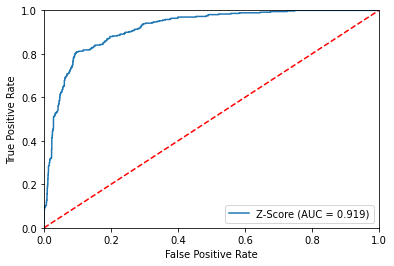

In [64]:
print("Results for Alman's Z-Score\n")

model_name ='Z-Score'
z_results = X_test.altman_z_score<Z_Score_threshold
z_results_score = X_test.altman_z_score
metrics_df, ROC_curve_df = show_results(model_name, y_test, z_results, -z_results_score)

set1_metrics.loc[model_name] = metrics_df.values[0]
set1_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set1_metrics
# set1_ROC_curve_df
# ROC_curve_df 
# metrics_df

Results for Alman's Z"-Score

Accuracy:  0.886
F1-score:  0.885
AUC score:  0.928

Confusion Matrix: 

 altman_z_two_tag_score  False  True 
future_bankruptcy                   
0.0                      1501    102
1.0                       121    236


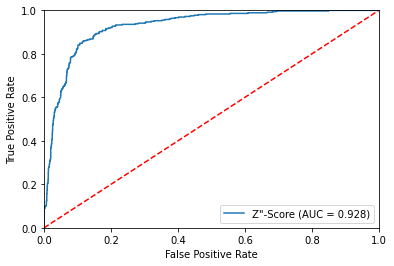

In [65]:
print("Results for Alman's Z\"-Score\n")

model_name ='Z"-Score'
z_two_tag_results = X_test.altman_z_two_tag_score<Z_two_tag_Score_threshold
z_two_tag_results_score = -X_test.altman_z_two_tag_score
metrics_df, ROC_curve_df = show_results(model_name, y_test, z_two_tag_results, z_two_tag_results_score)

set1_metrics.loc[model_name] = metrics_df.values[0]
set1_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

#### 7.3.2 Logistic Regression

#### Building the Model

We will build the linear regression model. 

First, we need to choose which features we are using. We can either use the ratios used in the Z-Score's, or the original features or the normalized features. We saw that if we chose the Z-Score ratios we didn't get good results. The original features and the normalized features gave mostly the same results. We eventually chose to use the original features.

In [66]:
# Z-Score ratios as features
# X_train = train_set1[['X1', 'X2','X3','X4','X5']]
# X_test = test_set1[['X1', 'X2','X3','X4','X5']]

# Original features
X_train  = train_set1[DATASET1_FEATURES]
X_test  = test_set1[DATASET1_FEATURES]

# Normalized features
# X_train  = train_set1[DATASET1_FEATURES_NORM]
# X_test  = test_set1[DATASET1_FEATURES_NORM]

y_test = test_set1['future_bankruptcy']
y_train = train_set1['future_bankruptcy']

We train now train the model. We tuned the parameters of the training model manually. 

We played around with different variables and looked at the results of the model on the trained data (accuracy, AUC, confusion matrix) and tried to get values that maximize the results. We did coarse tuning on the hyperparameters. We found that the most important parameters were the solver and the class_weight. We tried to maximize the AUC and looked at the accuracy and confusion matrix to see if the results made sense.

In [67]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver = 'lbfgs',
                                   C=1, 
                                   verbose = 1,
                                   max_iter=150,
                                   class_weight = 'balanced'
                                  )

log_reg_model.fit(X_train, y_train)
print('Logisitic regression coefficients: {}, intercept: {}'.format(log_reg_model.coef_[0], log_reg_model.intercept_[0],))

Logisitic regression coefficients: [ 3.91623823e-04 -3.32056834e-03 -3.06258686e-05 -5.15833052e-03
 -9.33437569e-03  5.22611431e-05  4.93279376e-04], intercept: 2.1887308044294


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [68]:
# Following cells were used to tune the training parameters

# train_set1['result_log_reg'] = log_reg_model.predict(X_train)
# train_set1['result_log_reg_prob'] = log_reg_model.predict_proba(X_train)[:,1]

In [69]:
# accuracy = skm.accuracy_score( y_train, train_set1['result_log_reg'])
# accuracy

In [70]:
# auc = skm.roc_auc_score(y_train,train_set1['result_log_reg_prob'], average='weighted')
# auc

In [71]:
# pd.crosstab(y_train, train_set1['result_log_reg'])

In [72]:
# train_set1.groupby('result_log_reg')['result_log_reg'].count()

#### Analyzing the results

We will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [73]:
test_set1['result_log_reg'] = log_reg_model.predict(X_test)
test_set1['result_log_reg_prob'] = log_reg_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock - NasdaqGS:AKRX 

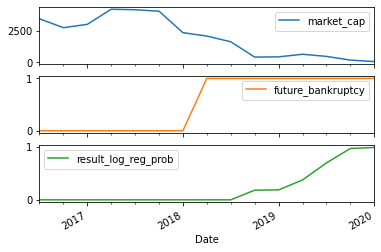

In [74]:
test_set1.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_log_reg_prob']].plot(subplots=True);

We can see our model starts to see problems a year before the bankruptcy occurs.

Next, we will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph. We will save the matrics in the results dataframe for use in the future reference.

Accuracy:  0.913
F1-score:  0.916
AUC score:  0.966

Confusion Matrix: 

 result_log_reg      0.0  1.0
future_bankruptcy           
0.0                1486  117
1.0                  53  304


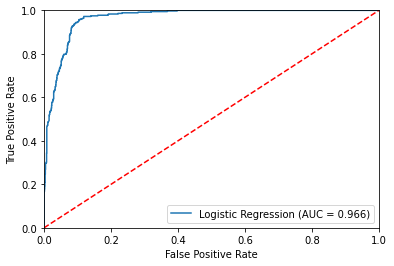

In [75]:
model_name = 'Logistic Regression'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set1.result_log_reg, test_set1.result_log_reg_prob)

set1_metrics.loc[model_name] = metrics_df.values[0]
set1_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set1_metrics
# set1_ROC_curve_df
# ROC_curve_df 
# metrics_df

#### 7.3.3 Random Forest

#### Building the Model

We will now build the random forest model. This time it we used the original features. Since the model is random forest model, it doesn't matter is we use the normalized values or the original values, so we used the original values.

In [76]:
# X_train = train_set1[['X1', 'X2','X3','X4','X5']]
# X_test = test_set1[['X1', 'X2','X3','X4','X5']]

X_train  = train_set1[DATASET1_FEATURES]
X_test  = test_set1[DATASET1_FEATURES]

# X_train  = train_set1[DATASET1_FEATURES_NORM]
# X_test  = test_set1[DATASET1_FEATURES_NORM]

y_test = test_set1['future_bankruptcy']
y_train = train_set1['future_bankruptcy']

Like we did before we played with the different parameters to get good results. Random forest has a tendency to overfit. As with logistic regression, in the random forest model the 'balanced' value for the class_weight variable was important in order to get good results.

In [77]:
from sklearn.ensemble import  RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.1,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    class_weight='balanced',
    max_samples = 0.5
)

random_forest_model.fit(X_train, y_train);

In [78]:
# # Following cells were used to tune the training parameters

# train_set1['result_rand_forest'] = random_forest_model.predict(X_train)
# train_set1['result_rand_forest_prob'] = random_forest_model.predict_proba(X_train)[:,1]

In [79]:
# accuracy = skm.accuracy_score( y_train, train_set1['result_rand_forest'])
# accuracy

In [80]:
# auc = skm.roc_auc_score(y_train,train_set1['result_rand_forest_prob'], average='weighted')
# auc

In [81]:
# pd.crosstab(y_train, train_set1['result_rand_forest'])

In [82]:
# train_set1.groupby('result_rand_forest')['result_rand_forest'].count()

#### Analyzing the results

First, we will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [83]:
test_set1['result_rand_forest'] = random_forest_model.predict(X_test)
test_set1['result_rand_forest_prob'] = random_forest_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock.

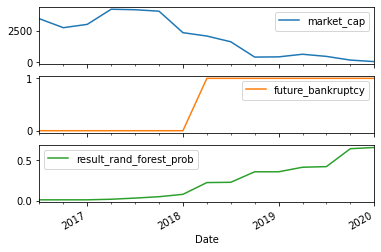

In [84]:
test_set1.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_rand_forest_prob']].plot(subplots=True);

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph. 

Accuracy:  0.900
F1-score:  0.900
AUC score:  0.953

Confusion Matrix: 

 result_rand_forest   0.0  1.0
future_bankruptcy            
0.0                 1502  101
1.0                   95  262


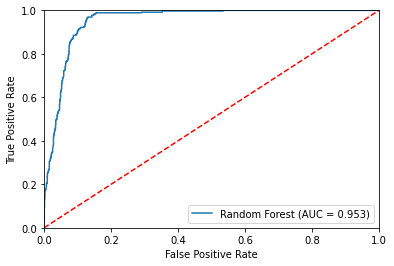

In [85]:
model_name = 'Random Forest'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set1.result_rand_forest, test_set1.result_rand_forest_prob)

set1_metrics.loc[model_name] = metrics_df.values[0]
set1_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set1_metrics
# set1_ROC_curve_df
# ROC_curve_df 
# metrics_df

#### 7.3.4 SVM

#### Building the Model

We will build the SVM model. With the SVM model the model converged fastest when we used the normalized features.

In [86]:
# X_train = train_set1[['X1', 'X2','X3','X4','X5']]
# X_test = test_set1[['X1', 'X2','X3','X4','X5']]

# X_train  = train_set1[DATASET1_FEATURES]
# X_test  = test_set1[DATASET1_FEATURES]

X_train  = train_set1[DATASET1_FEATURES_NORM]
X_test  = test_set1[DATASET1_FEATURES_NORM]

y_test = test_set1['future_bankruptcy']
y_train = train_set1['future_bankruptcy']

We played with the parameters. We got the best results when our kernel was linear. Again the 'balanced' class_weight was important in order to get a good solution.

In [87]:
from sklearn.svm import  SVC

svm_model = SVC(kernel = 'linear',
#                 max_iter = 1e5,
                C = 10,
                class_weight = 'balanced',
                verbose = True,
                probability = True,
               random_state=0)


svm_model.fit(X_train, y_train);

[LibSVM]

In [88]:
# # Following cells were used to tune the training parameters

# train_set1['result_svm'] = svm_model.predict(X_train)
# train_set1['result_svm_prob'] = svm_model.predict_proba(X_train)[:,1]

In [89]:
# accuracy = skm.accuracy_score( y_train, train_set1['result_svm'])
# accuracy

In [90]:
# auc = skm.roc_auc_score(y_train,train_set1['result_svm'], average='weighted')
# auc

In [91]:
# pd.crosstab(y_train, train_set1['result_svm'])

In [92]:
# train_set1.groupby('result_svm')['result_svm'].count()

#### Analyzing the results

First, we will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [93]:
test_set1['result_svm'] = svm_model.predict(X_test)
test_set1['result_svm_prob'] = svm_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock.

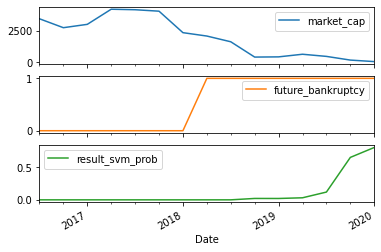

In [94]:
test_set1.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_svm_prob']].plot(subplots=True);

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph.

Accuracy:  0.914
F1-score:  0.917
AUC score:  0.958

Confusion Matrix: 

 result_svm          0.0  1.0
future_bankruptcy           
0.0                1484  119
1.0                  49  308


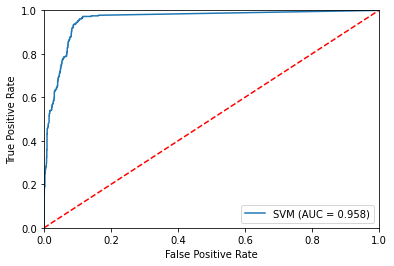

In [95]:
model_name = 'SVM'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set1.result_svm, test_set1.result_svm_prob)

set1_metrics.loc[model_name] = metrics_df.values[0]
set1_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set1_metrics
# set1_ROC_curve_df
# ROC_curve_df 
# metrics_df

#### 7.3.5 Neural Network

#### Building the Model

We will build now the neural network model. We used the normalized features for this model.

In [96]:
# X_train = train_set1[['X1', 'X2','X3','X4','X5']]
# X_test = test_set1[['X1', 'X2','X3','X4','X5']]

# X_train  = train_set1[DATASET1_FEATURES]
# X_test  = test_set1[DATASET1_FEATURES]

X_train  = train_set1[DATASET1_FEATURES_NORM]
X_test  = test_set1[DATASET1_FEATURES_NORM]

y_test = test_set1['future_bankruptcy']
y_train = train_set1['future_bankruptcy']

As we did before we played with the different parameters to get good results. For the neural network there is no option to 'balance' the data. This really hurt the F1-Score of the model. The most significant variables were the solver which was lbfgs and the relu activation function. As for the hidden_layer_size, we had to play around with it to get good results. If the model was too small or too big than we wouldn't get good results.

In [97]:
from sklearn.neural_network import MLPClassifier

neural_network_model = MLPClassifier(solver='lbfgs',
                      max_iter=2000,
                      activation = 'relu',
                      hidden_layer_sizes = [10, 10, 50, 20, 10, 10, 5],
                      learning_rate = 'adaptive',
                      shuffle = True,
                      early_stopping = False,
                      verbose = True,
                      random_state = 0)

neural_network_model.fit(X_train, y_train);

In [98]:
# # Following cells were used to tune the training parameters
# 
# train_set1['result_neural_network'] = neural_network_model.predict(X_train)
# train_set1['result_neural_network_prob'] = neural_network_model.predict_proba(X_train)[:,1]

In [99]:
# accuracy = skm.accuracy_score( y_train, train_set1['result_neural_network'])
# accuracy

In [100]:
# auc = skm.roc_auc_score(y_train,train_set1['result_neural_network'], average='weighted')
# auc

In [101]:
# pd.crosstab(y_train, train_set1['result_neural_network'])

In [102]:
# train_set1.groupby('result_neural_network')['result_neural_network'].count()

#### Analyzing the results

First, we will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [103]:
test_set1['result_neural_network'] = neural_network_model.predict(X_test)
test_set1['result_neural_network_prob'] = neural_network_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock.

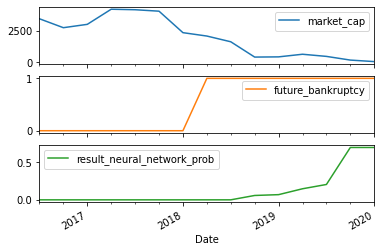

In [104]:
test_set1.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_neural_network_prob']].plot(subplots=True);

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph.

Accuracy:  0.887
F1-score:  0.877
AUC score:  0.956

Confusion Matrix: 

 result_neural_network   0.0  1.0
future_bankruptcy               
0.0                    1558   45
1.0                     176  181


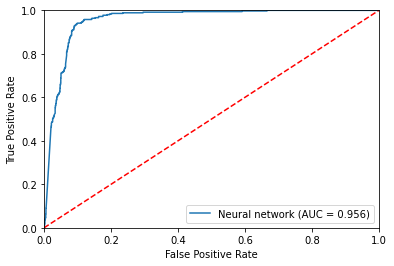

In [105]:
model_name = 'Neural network'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set1.result_neural_network, test_set1.result_neural_network_prob)

set1_metrics.loc[model_name] = metrics_df.values[0]
set1_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set1_metrics
# set1_ROC_curve_df
# ROC_curve_df 
# metrics_df

#### 7.3.6 Summary

We will now display a summary of our results. First, we will show the metrics that we have collected for the various models. We will then plot the ROC for all the models.

accuracy        f1       auc                conf_matrix
Model                                                                       
Z-Score              0.887755  0.885116  0.918505   [[1513, 90], [130, 227]]
Z"-Score             0.886224  0.885004  0.928064  [[1501, 102], [121, 236]]
Logistic Regression  0.913265  0.915949  0.966292   [[1486, 117], [53, 304]]
Random Forest        0.900000  0.900323  0.953190   [[1502, 101], [95, 262]]
SVM                  0.914286  0.917156  0.958285   [[1484, 119], [49, 308]]
Neural network       0.887245  0.876790  0.955548   [[1558, 45], [176, 181]]

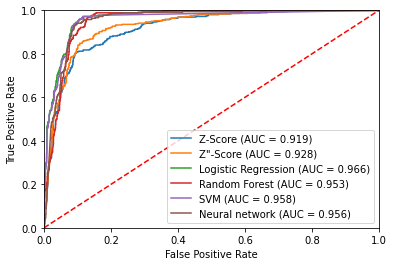

In [106]:
plot_ROC(set1_ROC_curve_df)
set1_metrics

It is pretty obvious that the more advanced models outperform the Z-Score models. We can see it in all the metrics, but it is most obvious on the ROC graph. For the other models, the AUC scores are pretty similar. The logistic regression model seems to stand out as a bit better then the other models. If we look at the confusion matrix we can see that both the Logistic regression and the SVM seem to have given the best results. We will show this.

In [107]:
print('\nLogistic Regression: \n\n',set1_metrics.loc['Logistic Regression']['conf_matrix'])
print('\nSVM: \n\n',set1_metrics.loc['SVM']['conf_matrix'])
print('\nRandom Forest: \n\n',set1_metrics.loc['Random Forest']['conf_matrix'])
print('\nNeural network: \n\n',set1_metrics.loc['Neural network']['conf_matrix'])


Logistic Regression: 

 [[1486  117]
 [  53  304]]

SVM: 

 [[1484  119]
 [  49  308]]

Random Forest: 

 [[1502  101]
 [  95  262]]

Neural network: 

 [[1558   45]
 [ 176  181]]


In the second row of the matrices represents that the actual value is 1 (meaning bankruptcy) and the bottom left cell is the false negative. We can see that for the first two models the false negative is relatively small as opposed to the other two. The false negative of the neural network is especially bad. That can be expected since there was no 'balance' option to in the training model.

### 7.4 Models on Dataset 2

In this section we will try to build more accurate models by using more features. We will use dataset2 for this. Here is a reminder of the features in the dataset:
1. Total assets
2. Working capitol 
3. Retained earnings 
4. Earnings before interest and taxes (EBIT)
5. Market capitalization 
6. Total liabilities  
7. Revenues
8. EPS
9. Current assets
10. Current liabilities
11. Sector_num
12. Sector_txt
13. One-hot encoding for all sectors

The models we are going to build are the following:
1. Logistic Regression
2. Decision Tree
3. SVM
4. Neural network


In the data exploration section, we saw that certain features are highly correlated. There is no point in adding highly correlated features since it increases the dimension of the input space without adding information. Higher dimensional input means the need to more data to produce good results, one thing we are lacking. 

We saw that total_assets is highly correlated with total_liabilities and that working_capital is highly correlated with current_assets. This means that to get better result we have to remove total_liabilities and current_assests. We have no problem removing current_assets since it is a feature we decided to add the data. As for the total_liabilites, it is part of the original Z-Score features in dataset1. In this subsection we want to check if adding features helps in created better models so removing a feature from dataset1 could be problematic in order to reach conclusions, even though it is the right thing to do in our circumstance. Just to be on the safe side we ran the following section  twice. Once with both features removed and a second with only current_assets . With 3 of the models we built we saw almost no difference in performance. The only non-negligible difference was for the neural network model. We saved the results of the two runs in files so we can compare them in the summary.

Before we build the models, we have to do some preliminary work. First thing is to decide which features we will be working on and then to create a copy of dataset2 with only those features. 

In [108]:
feature_flag = 1

if feature_flag == 1:
    # 'total_liabilities' and 'current_assets' removed
    features_without_sector = ['total_assets','working_capital','retained_earnings','ebit','market_cap','revenues',
                        'eps', 'current_liabilities']
if feature_flag == 2:
    # # 'current_assets' removed
    features_without_sector = ['total_assets','working_capital','retained_earnings','ebit','market_cap','total_liabilities','revenues',
                        'eps', 'current_assets', 'current_liabilities']

features = features_without_sector + ['sector_num', 'sector_txt']
features_norm = [x + '_norm' for x in features_without_sector]


dataset2_simple = dataset2[features + SECTOR_ONE_HOT + ['future_bankruptcy']].copy()
# dataset2_simple

We will split the dataset into training and test sets.

In [109]:
train_set2, test_set2 = split_train_test(dataset2_simple, 0.7)

Like the last section we will add the normalized the features. We will normalize according to the training set like we did in the previous section.

In [110]:
scaling = StandardScaler()

scaling.fit(train_set2[features_without_sector]);

# scaling.mean_
# scaling.var_

In [111]:
train_set2 = train_set2.reindex(columns=train_set2.columns.tolist() + features_norm)
test_set2 = test_set2.reindex(columns=test_set2.columns.tolist() + features_norm)

train_set2[features_norm] = scaling.transform(train_set2[features_without_sector])
test_set2[features_norm] = scaling.transform(test_set2[features_without_sector])

In [112]:
# train_set2[DATASET2_FEATURES_NORM].mean(axis=0)
# train_set2[DATASET2_FEATURES_NORM].std(axis=0)
# test_set2[DATASET2_FEATURES_NORM].mean(axis=0)
# test_set2[DATASET2_FEATURES_NORM].std(axis=0)

Finally we will create a pandas dataframes where we will store all the metrics we will use compare the different models, and the data needed to plot the ROC curve. 

In [113]:
set2_metrics = pd.DataFrame(columns=['Model', 'accuracy', 'f1', 'auc', 'conf_matrix']).set_index('Model')
set2_ROC_curve_df = pd.DataFrame(columns=['Model', 'fpr', 'tpr', 'auc']).set_index('Model')

We will define two variables that we will be using allot. These are the features we will be training on. We will use all the features in dataset2 and the sector as hot-one encoding columns. We will define a similar list for the normalized features. 

In [114]:
training_features = features_without_sector + SECTOR_ONE_HOT
training_features_norm = features_norm + SECTOR_ONE_HOT

#### 7.4.1 Logistic Regression

#### Building the Model

We will now build the linear regression model. 

The original features and the normalized features gave mostly the same results. The normalized features gave slightly better results so we chose to use them.

In [115]:
# Original features
# X_train  = train_set2[training_features]
# X_test  = test_set2[training_features]

# Normalized features
X_train  = train_set2[training_features_norm]
X_test  = test_set2[training_features_norm]

y_test = test_set2['future_bankruptcy']
y_train = train_set2['future_bankruptcy']

We train now train the model. The process is the same as we did for dataset1. 

We found that the most important parameter was the 'balanced' class_weight. As for the solver, 'newton-cg', 'lbfgs' and 'liblinear' gave similar results. The settings we ended up being exactly the same as those used in the linear regression of dataset1.

In [116]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(solver = 'lbfgs',
                                   C=1, 
                                   verbose = 1,
                                   max_iter=150,
                                   class_weight = 'balanced'
                                  )

log_reg_model.fit(X_train, y_train)
print('Logisitic regression coefficients: {}, intercept: {}'.format(log_reg_model.coef_[0], log_reg_model.intercept_[0],))

Logisitic regression coefficients: [  0.86803403  -2.22579001  -0.26573926  -0.85271926 -12.29374143
   0.29921416  -0.16950377  -0.48505238   0.30070702   0.5631737
  -0.16623141   0.33134097   0.44666865  -0.29888961  -0.8258839
  -0.06871298   0.16340886   0.42653247  -0.84490312], intercept: -12.846805358640218


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [117]:
# # Following cells were used to tune the training parameters

# train_set2['result_log_reg'] = log_reg_model.predict(X_train)
# train_set2['result_log_reg_prob'] = log_reg_model.predict_proba(X_train)[:,1]

In [118]:
# accuracy = skm.accuracy_score( y_train, train_set2['result_log_reg'])
# accuracy

In [119]:
# auc = skm.roc_auc_score(y_train,train_set2['result_log_reg_prob'], average='weighted')
# auc

In [120]:
# pd.crosstab(y_train, train_set2['result_log_reg'])

In [121]:
# train_set2.groupby('result_log_reg')['result_log_reg'].count()

#### Analyzing the results

We will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [122]:
test_set2['result_log_reg'] = log_reg_model.predict(X_test)
test_set2['result_log_reg_prob'] = log_reg_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock - NasdaqGS:AKRX 

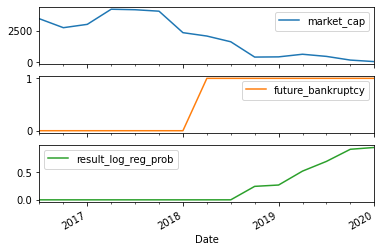

In [123]:
test_set2.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_log_reg_prob']].plot(subplots=True);

We can see our model starts to see the probability of bankruptcy starts to go up almost two years before the bankruptcy occurs.

Next, we will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph. We will save the metrics in the results dataframe for use in the future reference.

Accuracy:  0.915
F1-score:  0.918
AUC score:  0.961

Confusion Matrix: 

 result_log_reg      0.0  1.0
future_bankruptcy           
0.0                1480  123
1.0                  44  313


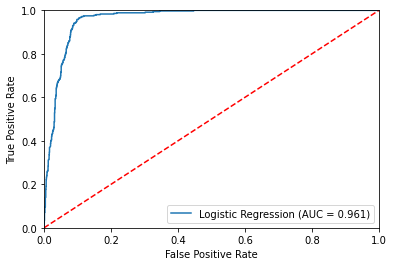

In [124]:
model_name = 'Logistic Regression'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set2.result_log_reg, test_set2.result_log_reg_prob)

set2_metrics.loc[model_name] = metrics_df.values[0]
set2_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set2_metrics
# set2_ROC_curve_df
# ROC_curve_df 
# metrics_df

In [125]:
# y_materials =  test_set2[test_set2['Materials'] ==1]['future_bankruptcy']
# results_materials = test_set2[test_set2['Materials'] ==1]['result_log_reg']
# results__proba_materials = test_set2[test_set2['Materials'] ==1]['result_log_reg_prob']
# _, _ = show_results(model_name,y_materials, results_materials, results__proba_materials)

#### 7.4.2 Random Forest

####  Building the Model

We will now build the random forest model. This time we used the original features.

In [126]:
# Original features
X_train  = train_set2[training_features]
X_test  = test_set2[training_features]

# Normalized features
# X_train  = train_set2[training_features_norm]
# X_test  = test_set2[training_features_norm]

y_test = test_set2['future_bankruptcy']
y_train = train_set2['future_bankruptcy']

After playing around with various variables hardly changed the model performance. We ended using the same values as we used when training the random forest for dataset1.

In [127]:
from sklearn.ensemble import  RandomForestClassifier

random_forest_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.1,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    class_weight='balanced',
    max_samples = 0.5
)

random_forest_model.fit(X_train, y_train);

In [128]:
# # # Following cells were used to tune the training parameters

# train_set2['result_rand_forest'] = random_forest_model.predict(X_train)
# train_set2['result_rand_forest_prob'] = random_forest_model.predict_proba(X_train)[:,1]

In [129]:
# accuracy = skm.accuracy_score( y_train, train_set2['result_rand_forest'])
# accuracy

In [130]:
# auc = skm.roc_auc_score(y_train,train_set2['result_rand_forest_prob'], average='weighted')
# auc

In [131]:
# pd.crosstab(y_train, train_set2['result_rand_forest'])

In [132]:
# train_set2.groupby('result_rand_forest')['result_rand_forest'].count()

#### Analyzing the results

First, we will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [133]:
test_set2['result_rand_forest'] = random_forest_model.predict(X_test)
test_set2['result_rand_forest_prob'] = random_forest_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock.

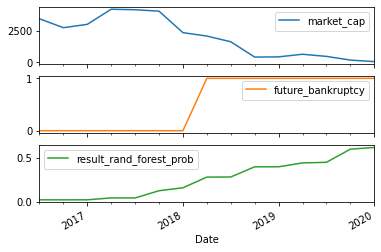

In [134]:
test_set2.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_rand_forest_prob']].plot(subplots=True);

An interesting point is that that the random forest started to detect a problem with the company three years before the bankruptcy.

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph. 

Accuracy:  0.901
F1-score:  0.902
AUC score:  0.952

Confusion Matrix: 

 result_rand_forest   0.0  1.0
future_bankruptcy            
0.0                 1498  105
1.0                   89  268


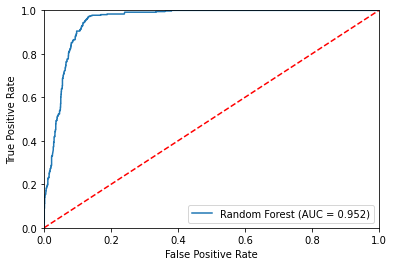

In [135]:
model_name = 'Random Forest'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set2.result_rand_forest, test_set2.result_rand_forest_prob)

set2_metrics.loc[model_name] = metrics_df.values[0]
set2_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set2_metrics
# set2_ROC_curve_df
# ROC_curve_df 
# metrics_df

In [136]:
# y_materials =  test_set2[test_set2['Materials'] ==1]['future_bankruptcy']
# results_materials = test_set2[test_set2['Materials'] ==1]['result_rand_forest']
# results__proba_materials = test_set2[test_set2['Materials'] ==1]['result_rand_forest_prob']
# _, _ = show_results(model_name,y_materials, results_materials, results__proba_materials)

#### 7.4.3 SVM

#### Building the Model

We will build the SVM model. With the SVM model the model converged fastest when we used the normalized features.

In [137]:
# Original features
# X_train  = train_set2[training_features]
# X_test  = test_set2[training_features]

# Normalized features
X_train  = train_set2[training_features_norm]
X_test  = test_set2[training_features_norm]

y_test = test_set2['future_bankruptcy']
y_train = train_set2['future_bankruptcy']

When playing around with the parameters, we found that the parameters we found for dataset1 gave the best result, apart for C. When we lowered C from 10 to 1 greatly improved the results. 

In [138]:
from sklearn.svm import  SVC

svm_model = SVC(kernel = 'linear',
#                 max_iter = 1e5,
                C = 1,
                class_weight = 'balanced',
                verbose = True,
                probability = True,
               random_state=0)


svm_model.fit(X_train, y_train);

[LibSVM]

In [139]:
# # # Following cells were used to tune the training parameters

# train_set2['result_svm'] = svm_model.predict(X_train)
# train_set2['result_svm_prob'] = svm_model.predict_proba(X_train)[:,1]

In [140]:
# accuracy = skm.accuracy_score( y_train, train_set2['result_svm'])
# accuracy

In [141]:
# auc = skm.roc_auc_score(y_train,train_set2['result_svm'], average='weighted')
# auc

In [142]:
# pd.crosstab(y_train, train_set2['result_svm'])

In [143]:
# train_set2.groupby('result_svm')['result_svm'].count()

#### Analyzing the results

First, we will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [144]:
test_set2['result_svm'] = svm_model.predict(X_test)
test_set2['result_svm_prob'] = svm_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock.

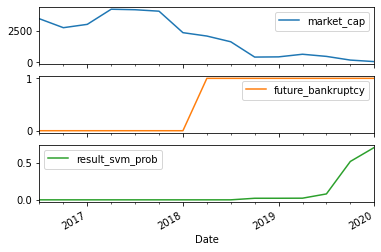

In [145]:
test_set2.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_svm_prob']].plot(subplots=True);

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph.

Accuracy:  0.912
F1-score:  0.915
AUC score:  0.956

Confusion Matrix: 

 result_svm          0.0  1.0
future_bankruptcy           
0.0                1481  122
1.0                  51  306


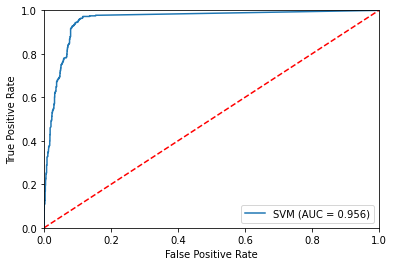

In [146]:
model_name = 'SVM'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set2.result_svm, test_set2.result_svm_prob)

set2_metrics.loc[model_name] = metrics_df.values[0]
set2_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# set2_metrics
# set2_ROC_curve_df
# ROC_curve_df 
# metrics_df

In [147]:
# y_materials =  test_set2[test_set2['Materials'] ==1]['future_bankruptcy']
# results_materials = test_set2[test_set2['Materials'] ==1]['result_svm']
# results__proba_materials = test_set2[test_set2['Materials'] ==1]['result_svm_prob']
# _, _ = show_results(model_name,y_materials, results_materials, results__proba_materials)

#### 7.4.4 Neural Network

#### Building the Model

Now we will build the neural network model. We used the normalized features for this model as they also converge faster.

In [148]:
# Original features
# X_train  = train_set2[training_features]
# X_test  = test_set2[training_features]

# Normalized features
X_train  = train_set2[training_features_norm]
X_test  = test_set2[training_features_norm]

y_test = test_set2['future_bankruptcy']
y_train = train_set2['future_bankruptcy']

As we did before, we played with the different parameters to get good results. There were two significant changes we made from the parameters settings we used in dataset1. The first was changing the activation function from 'relu' to 'tanh'. This made a profound difference. The second was to limit the maximum number of iterations. Not doing this would overfit the models and we would get poor results. Again the lack of the 'balance' option in training the neural network made the result not as good as the other models.

Note: When running this cell you will receive ConvergenceWarning that the model failed to converge. This is on purpose. In the absence of a validation set (due to the small dataset we have) we are using the limitation of iterations as a form of regularization. If we increase the number of iterations, we get overfitting. That is why we have set a maximum of 500 iterations.

In [149]:
from sklearn.neural_network import MLPClassifier

neural_network_model = MLPClassifier(solver='lbfgs',
                      max_iter=500,
                      activation = 'tanh',
                      hidden_layer_sizes = [10, 10, 50, 20, 10, 10, 5],
                      learning_rate = 'adaptive',
                      shuffle = True,
                      early_stopping = False,
                      verbose = True,
                      random_state = 0)


neural_network_model.fit(X_train, y_train);

/home/eliran/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [150]:
# # Following cells were used to tune the training parameters

# train_set2['result_neural_network'] = neural_network_model.predict(X_train)
# train_set2['result_neural_network_prob'] = neural_network_model.predict_proba(X_train)[:,1]

In [151]:
# accuracy = skm.accuracy_score( y_train, train_set2['result_neural_network'])
# accuracy

In [152]:
# auc = skm.roc_auc_score(y_train,train_set2['result_neural_network'], average='weighted')
# auc

In [153]:
# pd.crosstab(y_train, train_set2['result_neural_network'])

In [154]:
# train_set2.groupby('result_neural_network')['result_neural_network'].count()

##### Analyzing the results

First, we will calculate the predictions for the test set. We will give the both the model prediction and the probability for that prediction. We will store the results in the test dataset.

In [155]:
test_set2['result_neural_network'] = neural_network_model.predict(X_test)
test_set2['result_neural_network_prob'] = neural_network_model.predict_proba(X_test)[:,1]

We will plot the results the predictability as a function of time for our dummy stock.

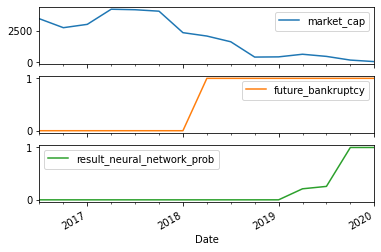

In [156]:
test_set2.loc['NasdaqGS:AKRX'][['market_cap', 'future_bankruptcy', 'result_neural_network_prob']].plot(subplots=True);

We will calculate and display the accuracy, F1-score, AUC score and confusion matrix, along with the ROC graph.

Accuracy:  0.891
F1-score:  0.877
AUC score:  0.959

Confusion Matrix: 

 result_neural_network   0.0  1.0
future_bankruptcy               
0.0                    1579   24
1.0                     190  167


accuracy        f1       auc               conf_matrix
Model                                                                      
Logistic Regression  0.914796  0.917964  0.960746  [[1480, 123], [44, 313]]
Random Forest        0.901020  0.901857  0.951601  [[1498, 105], [89, 268]]
SVM                  0.911735  0.914727  0.955928  [[1481, 122], [51, 306]]
Neural network       0.890816  0.876967  0.959350  [[1579, 24], [190, 167]]

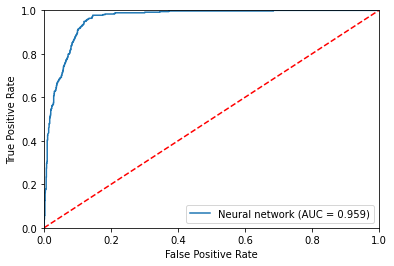

In [157]:
model_name = 'Neural network'

metrics_df, ROC_curve_df = show_results(model_name, y_test, test_set2.result_neural_network, test_set2.result_neural_network_prob)

set2_metrics.loc[model_name] = metrics_df.values[0]
set2_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

set2_metrics
# set2_ROC_curve_df
# ROC_curve_df 
# metrics_df

#### 7.4.5 Saving and loading results

We will save the results to an appropriate files so that we will be able to compare the results of removing both 'total_liabilities' and 'current_assets' as opposed to removing just 'current_assets'. 

set2_metrics1 will hold the results for the smaller dataset ('total_liabilities' and 'current_assets' removed)
set2_metrics2 will hold the results for the larger dataset (only 'current_assets' removed)

In [158]:
if feature_flag == 1:
    # choose this if 'total_liabilities' and 'current_assets' removed
    set2_metrics.to_pickle('./Data/Results/set2_metrics1')
    set2_ROC_curve_df.to_pickle('./Data/Results/set2_ROC_curve1')

    set2_metrics1 = set2_metrics
    set2_ROC_curve_df1 = set2_ROC_curve_df
    set2_metrics2 = pd.read_pickle('./Data/Results/set2_metrics2')
    set2_ROC_curve_df2 = pd.read_pickle('./Data/Results/set2_ROC_curve2')


if feature_flag == 2:
    # choose this if only 'current_assets' removed
    set2_metrics.to_pickle('./Data/Results/set2_metrics2')
    set2_ROC_curve_df.to_pickle('./Data/Results/set2_ROC_curve2')

    set2_metrics1 = pd.read_pickle('./Data/Results/set2_metrics1')
    set2_ROC_curve_df1 = pd.read_pickle('./Data/Results/set2_ROC_curve1')
    set2_metrics2 = set2_metrics
    set2_ROC_curve_df2 = set2_ROC_curve_df

#### 7.4.6 Summary

We will now display a summary of our results. We will want to compare the results we got in this section (models on dataset2) to the results we got in the previous one (models on dataset1). 

As a reminder we will plot the results we got for models trained on dataset1.

accuracy        f1       auc                conf_matrix
Model                                                                       
Z-Score              0.887755  0.885116  0.918505   [[1513, 90], [130, 227]]
Z"-Score             0.886224  0.885004  0.928064  [[1501, 102], [121, 236]]
Logistic Regression  0.913265  0.915949  0.966292   [[1486, 117], [53, 304]]
Random Forest        0.900000  0.900323  0.953190   [[1502, 101], [95, 262]]
SVM                  0.914286  0.917156  0.958285   [[1484, 119], [49, 308]]
Neural network       0.887245  0.876790  0.955548   [[1558, 45], [176, 181]]

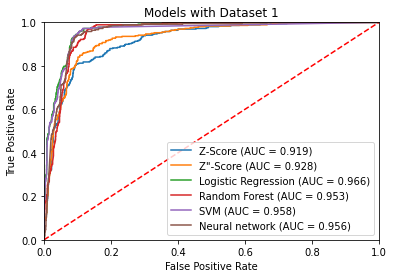

In [159]:
plot_ROC(set1_ROC_curve_df)
plt.title('Models with Dataset 1')
set1_metrics

We will now plot the results of models trained on dataset2 with 'total_liabilities' and 'current_assets' removed.

accuracy        f1       auc               conf_matrix
Model                                                                      
Logistic Regression  0.914796  0.917964  0.960746  [[1480, 123], [44, 313]]
Random Forest        0.901020  0.901857  0.951601  [[1498, 105], [89, 268]]
SVM                  0.911735  0.914727  0.955928  [[1481, 122], [51, 306]]
Neural network       0.890816  0.876967  0.959350  [[1579, 24], [190, 167]]

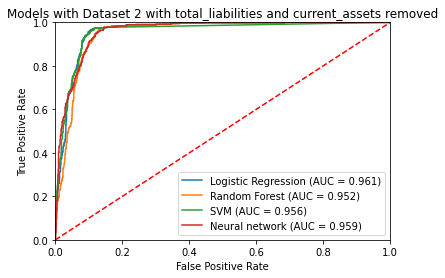

In [160]:
plot_ROC(set2_ROC_curve_df1)
plt.title('Models with Dataset 2 with total_liabilities and current_assets removed')
set2_metrics1

We will now plot the results of models trained on dataset2 with only 'current_assets' removed.

accuracy        f1       auc               conf_matrix
Model                                                                      
Logistic Regression  0.914796  0.917964  0.960805  [[1480, 123], [44, 313]]
Random Forest        0.901531  0.901477  0.950893   [[1507, 96], [97, 260]]
SVM                  0.911735  0.914727  0.955603  [[1481, 122], [51, 306]]
Neural network       0.872959  0.853921  0.950221  [[1572, 31], [218, 139]]

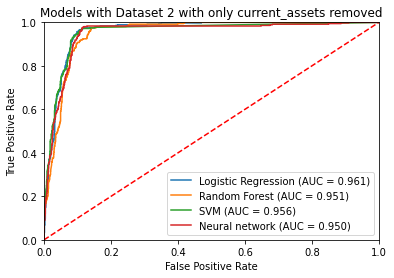

In [161]:
plot_ROC(set2_ROC_curve_df2)
plt.title('Models with Dataset 2 with only current_assets removed')
set2_metrics2

We can see that there are no major differences between the results of the models of dataset1 and those of the models on dataset2 (both versions). We can say that the models trained on dataset1 perform a slightly better than the models trained on dataset2, but the differences are insignificant. 

When we look at the differences between the AUC scores of the different models when we remove both total_liabilities and current_assets as opposed to just removing current_assets we see that the results for all the models are similar apart from the neural network. We can see a difference of 0.09 between two AUC scores. This is probably more due to parameter tuning than from actual differences in performance. 

Since we had to add regularization to the neural network to stop it from overfitting when adding more features, it is safe to say that the neural network is more vulnerable to the addition dimensions in the input space then the other algorithms.


## 8. Advanced models

In this section we will build advanced models. These models are outside of the scope of what we have learnt in the workshop. We did this to get some hands-on experience in using these libraries and techniques. The first advanced model is built using the TPOT library and the second model is a hand-written model we built.

Before we begin we will build two pandas dataframes we will use to hold the results of the advanced models.

In [162]:
advanced_metrics = pd.DataFrame(columns=['Model', 'accuracy', 'f1', 'auc', 'conf_matrix']).set_index('Model')
advanced_ROC_curve_df = pd.DataFrame(columns=['Model', 'fpr', 'tpr', 'auc']).set_index('Model')

### 8.1 TPOT
#### Rational

TPOT is a Python Automated Machine Learning tool from EpistasisLab that optimizes machine learning pipelines using genetic programming. More information on the library can be found [here](https://epistasislab.github.io/tpot/) , the TPOT implementation is based on the article "Scaling tree-based automated machine learning to biomedical big data with a feature set selector." by Trang T. Le, Weixuan Fu and Jason H. Moore (2020).  Bioinformatics.36(1): 250-256. The article can be fount [here](https://academic.oup.com/bioinformatics/article/36/1/250/5511404). In order to get this section to work you will need to install TPOT on your system. Instruction on how to do this can be found [here](https://epistasislab.github.io/tpot/installing/)

In this section we will try to predict the future_bankruptcy using automated machine learning tools. We will include all the features we have collected so far.

In [163]:
import tpot

/home/eliran/.local/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Our first step is to prepare the data. 
We will:
1. Load dataset2 as it contains more features than dataset1
2. We will add new features, the multiplication variables, as we saw (in chapter 6) that it can improve our model. This is a form of feature engineering. We will not add the division because some Tpot models fail with division.

In [164]:
# Load the data
data = dataset2.copy()
data = add_composite_features(data, add_div=False) # Add Composite features
data_flat = data.reset_index().copy()
# data

### Feature reduction

We will remove features that are highly correlated, as we did with in section 7.4. Since we have added composite features in this dataset, in order to find and remove the highly correlated features we will do a similar analysis to the one we did in the data exploration section. The difference is that this time we will also including the multiplication variables in our analysis. We have noticed TPOT does not handle it well in the training.

In [165]:
max_correl = 0.75

real_features = ['total_assets', 'working_capital', 'retained_earnings', 'ebit',
       'market_cap', 'total_liabilities', 'revenues', 'eps', 'current_assets',
       'current_liabilities']

comp_features = data.columns[data.columns.str.contains('_mul_')]
features = np.hstack([real_features,comp_features])

# Create correlation matrix
correl_mat = data_flat[features].corr().abs()

# Select upper triangle of correlation matrix
upper = correl_mat.where(np.triu(np.ones(correl_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than max_correl
to_drop = [column for column in upper.columns if any(upper[column] > max_correl)]

# Remove them
data.drop(columns=to_drop, inplace=True)

#print('Columns to drop: ',to_drop)

After removing the redundant features, we ended up with 24 features.

We will split the data into training and test sets and then start to model using TPOT. 

***The training takes a long time as generation and population size increases.
During the research we trained with 100/100 and stoped the training after 9 hours.***

In [166]:
train, test = split_train_test(data)
train = train.reset_index().drop(columns=['Symbol','Date','sector_num','sector_txt'])
test = test.reset_index().drop(columns=['Symbol','Date','sector_num','sector_txt'])

x_train = train.drop(columns=['future_bankruptcy']).values
x_test = test.drop(columns=['future_bankruptcy']).values

y_train = train.future_bankruptcy.values
y_test = test.future_bankruptcy.values

x_train.shape, y_train.shape

((9369, 24), (9369,))

TPOT running example

In [167]:
clf = tpot.TPOTClassifier(generations=5,
                          population_size=5,
                          offspring_size=None,
                          mutation_rate=0.9,
                          crossover_rate=0.1,
                          scoring='f1_macro', # this will force models with predict_proba
                          cv=7,
                          subsample=1.0,
                          n_jobs=-1,
                          max_time_mins=None,
                          max_eval_time_mins=5,
                          random_state=0,
                          config_dict=None,
                          template=None,
                          warm_start=False,
                          memory=None,
                          use_dask=False,
                          periodic_checkpoint_folder=None,
                          early_stop=10,
                          verbosity=2,
                          disable_update_check=False,
                          log_file=None
                          )

clf.fit(x_train, y_train)

clf.score(x_train,y_train)


Generation 1 - Current best internal CV score: 0.7129643698257137
Generation 2 - Current best internal CV score: 0.7129643698257137
Generation 3 - Current best internal CV score: 0.7575371632633255
Generation 4 - Current best internal CV score: 0.7938038828841331
Generation 5 - Current best internal CV score: 0.7938038828841331
Best pipeline: GaussianNB(input_matrix)


0.7208474686137185

#### We will save the best pipeline as markdown text so it won't get lost

Best pipeline: XGBClassifier(GaussianNB(input_matrix), learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.2)

Here are the results on the training set.

Accuracy:  0.852
F1-score:  0.879
AUC score:  0.936

Confusion Matrix: 

 col_0   0.0   1.0
row_0            
0.0    7196  1364
1.0      26   783


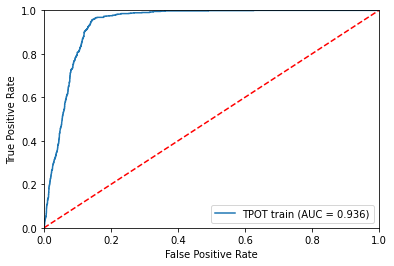

In [168]:
results = clf.predict(x_train)
results_proba = clf.predict_proba(x_train)
    
show_results("TPOT train", y_train, results, results_proba[:,1]);

More importantly here are the results on the test set.

Accuracy:  0.884
F1-score:  0.884
AUC score:  0.910

Confusion Matrix: 

 col_0   0.0  1.0
row_0           
0.0    1490  113
1.0     115  242


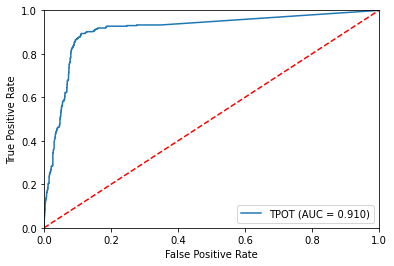

In [169]:
# Test results

results_test = clf.predict(x_test)
results_proba_test = clf.predict_proba(x_test)

model_name = 'TPOT'

show_results(model_name, y_test, results_test, results_proba_test[:,1]);

# advanced_metrics

TPOT offers us the option to save the best model discovered as a python file for later uses. There are notes on how to use it inside the file. More instructions are in the TPOT API [here](https://epistasislab.github.io/tpot/api/#tpotclassifier-export).

Appart from the instructions above there are a few extra steps that need to be taken:
1. We will have to replace the train_test_split with our customized split_train_test created in chapter 5.3.
2. We will need to rename 'future_bankruptcy' column to 'target' or modify it in the code

In [170]:
# save the model for future use
# clf.export('advanced_models-tpot.py')
print(clf.export())

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=0)

# Average CV score on the training set was: 0.7938038828841331
exported_pipeline = GaussianNB()
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 0)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



#### We will load the best TPOT model we have created
This is how we load a model saved in the export. This is the best model we have found.

In [171]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from xgboost import XGBClassifier

exported_pipeline = make_pipeline(
    tpot.builtins.StackingEstimator(estimator=GaussianNB()),
    XGBClassifier(learning_rate=0.1, max_depth=3, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.2)
)
# Fix random state for all the steps in exported pipeline
tpot.export_utils.set_param_recursive(exported_pipeline.steps, 'random_state', 0)

exported_pipeline.fit(x_train, y_train)

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=GaussianNB())),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=7, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, nthread=1, num_parallel_tree=1,
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.2,
                               tree_method='exact', validate_parameters=1,
                               verbo

Here are the results on the test set.

Accuracy:  0.897
F1-score:  0.886
AUC score:  0.962

Confusion Matrix: 

 col_0   0.0  1.0
row_0           
0.0    1573   30
1.0     172  185


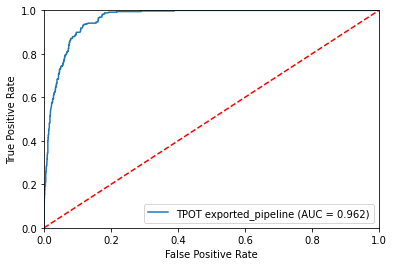

In [172]:
# Test results

results_test = exported_pipeline.predict(x_test)
results_proba_test = exported_pipeline.predict_proba(x_test)

model_name = 'TPOT exported_pipeline'

metrics_df, ROC_curve_df = show_results(model_name, y_test, results_test, results_proba_test[:,1])

advanced_metrics.loc[model_name] = metrics_df.values[0]
advanced_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# advanced_metrics

### Conclusions

1. Despite TPOT’s ease of use, it doesn’t work well out of the box.
2. We had to use 'f1_macro' score as it forced models to create predict_proba.
3. We needed to increase cross validation size to avoid overfitting.
4. Feature composite and feature reduction helped with preventing overfitting, as well as reduce the training time.
5. Normalization was not needed as TPOT handles this for us.
6. TPOT MBR with scikit-rebate was also used to produce much more complex models and advanced feature engineering. It failed to produce better models and training time was much longer.

### 8.2 Advanced Custom Classifier

#### Rational

In the data exploration part of this notebook we saw that the data distribution is different for the different sectors. In this section we will try to build a special, tailor made model. In order to build this model we will build a different model for each sector and then combine them all into a single model.

In [173]:
# We neet joblib to save our models
from joblib import dump, load

We will prepare the data the same as before in chapter 8.1.
This time we will include the "division" features

In [174]:
# Load the data
data = dataset2.copy() # Load the data
data = add_composite_features(data, add_div=True) # Add Composite features
data.dropna(inplace=True) # div columns may produce nan's and inf
data_flat = data.reset_index().copy()


max_correl = 0.75

real_features = ['total_assets', 'working_capital', 'retained_earnings', 'ebit',
       'market_cap', 'total_liabilities', 'revenues', 'eps', 'current_assets',
       'current_liabilities']

comp_features = data.columns[data.columns.str.contains('_mul_')]
features = np.hstack([real_features,comp_features])

# Create correlation matrix
correl_mat = data_flat[features].corr().abs()

# Select upper triangle of correlation matrix
upper = correl_mat.where(np.triu(np.ones(correl_mat.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than max_correl
to_drop = [column for column in upper.columns if any(upper[column] > max_correl)]

# Remove the high corralation features
data.drop(columns=to_drop, inplace=True)
#print('Columns to drop: ',to_drop)

#data

We will create a training and test set.

In [175]:
# Split the data to train and test
train, test = split_train_test(data)

#### Methodology

In order to build the final model, we will do the following steps for each sector: 
1. Data Exploration and visualization for the specific sector.
2. Test different models for the data, find a model that will fit best to the data distribution.
3. When we are happy with the model, we will save it.

After we have created the models for all the sectors, we will combine the results to create a custom classifier. The classifier will work as follows:
1. The classifier will mask the data for each sector.
2. The classifier will forecast each sector according to the saved model.
3. We will implement the both the predict and predict_proba functions for the classifier.

We will do these steps for all the sectors. Since there 11 different sectors, showing the training for all the all the sectors would make this notebook long and cumbersome. Instead, in the following cells we will show the process just for the "Industrials" sector (sector_num = 20) which is a sector which is one of the harder sectors to predict. The process is the same for all the other sectors. For each sector we changed the code in accordance to the appropriate sector_num.

In order to make it clearer, we will print the sectors together with their sector numbers.

In [176]:
# print the sectors list
data.reset_index()[['sector_num','sector_txt']].drop_duplicates()

sector_num              sector_txt
0             35             Health Care
50            10                  Energy
100           25  Consumer Discretionary
245           50  Communication Services
317           20             Industrials
467           45  Information Technology
510           60             Real Estate
1235          55               Utilities
1484          40              Financials
1793          30        Consumer Staples
1843          15               Materials

Let us remember the pairplots in the data exploration.

Industrials sector will probably be hard to predict

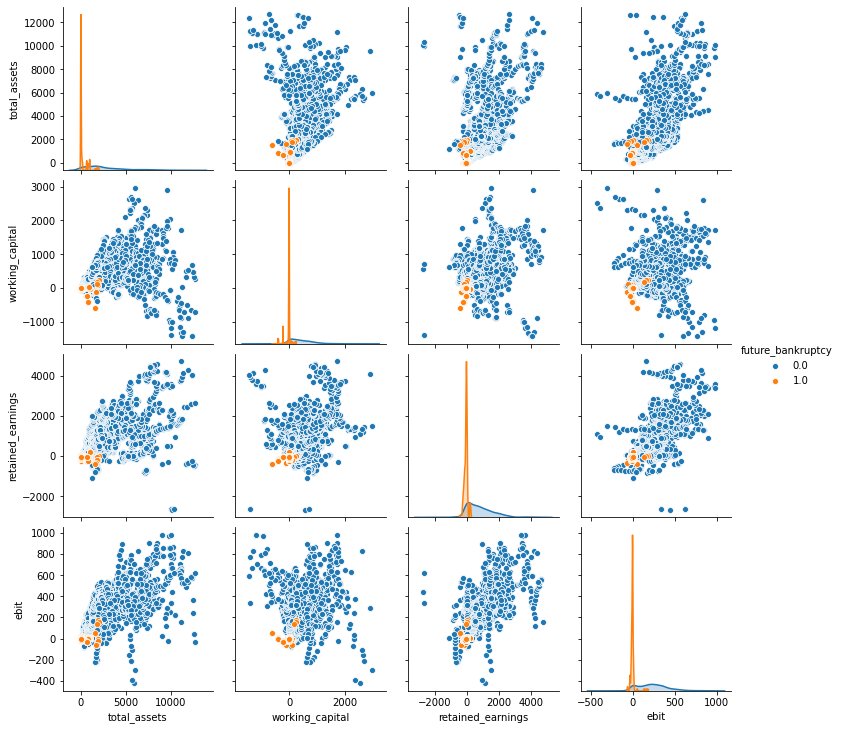

In [177]:
sns.pairplot(data.query('sector_num==20')[['total_assets', 'working_capital',
       'retained_earnings', 'ebit', 'future_bankruptcy']], hue='future_bankruptcy');

But might be easier using the multiplication columns, we can see clear spots where the bunkruptcy occurs

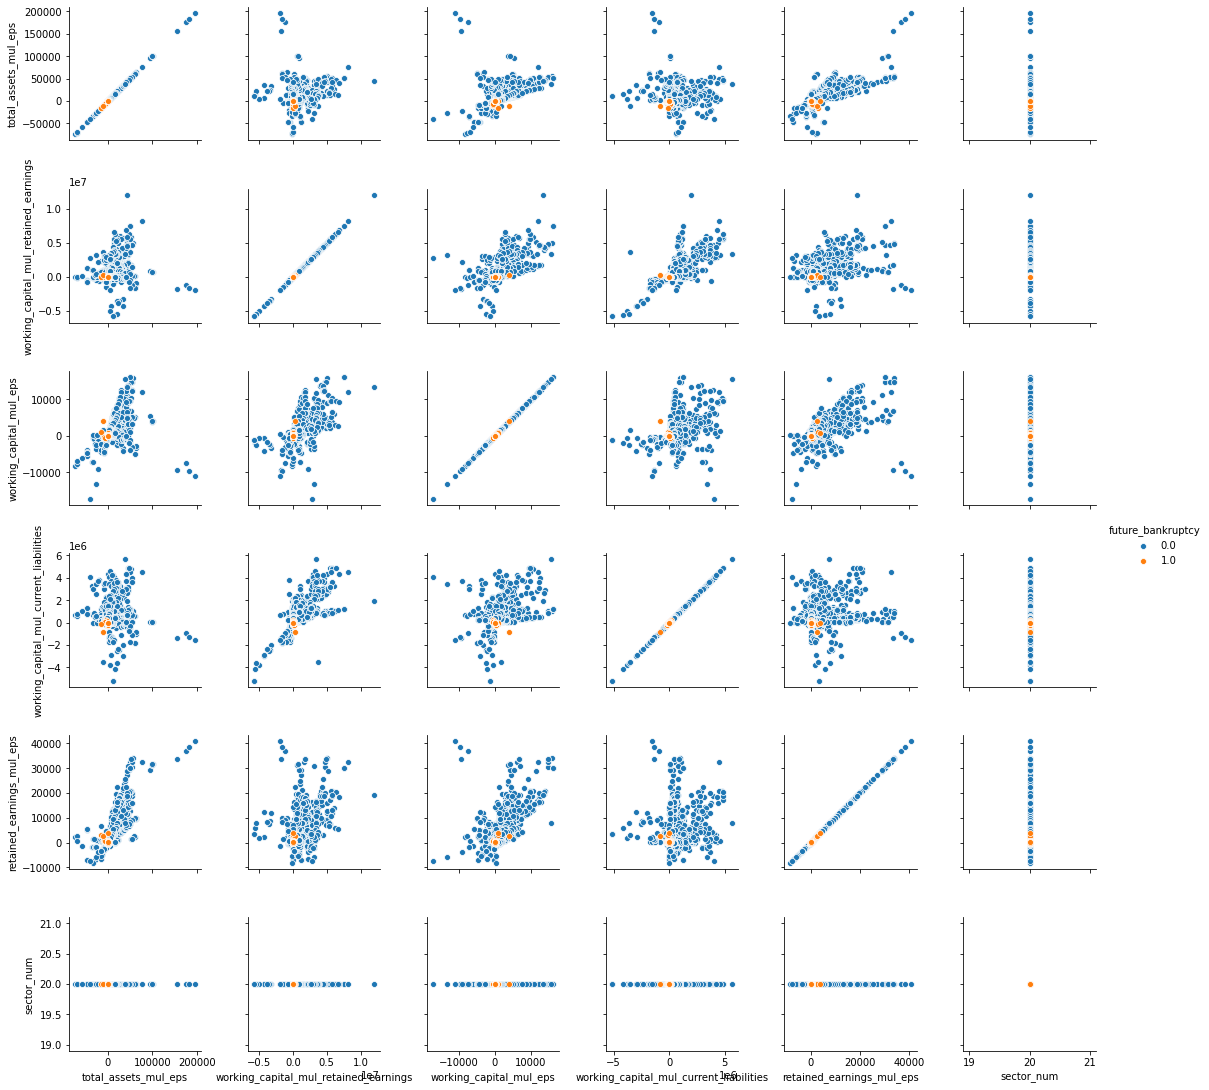

In [178]:
col_mask = np.concatenate( (data.columns[data.columns.str.contains('_mul_')] ,['sector_num', 'future_bankruptcy']) )
sns.pairplot(data[col_mask].query('sector_num==20'), diag_kind = None, hue='future_bankruptcy');

The following cell trains the model. As you can see we can comment in and out different configurations of different models.

We will try to build the best model we can using:
1. Different features list
2. Different classifiers
3. Different kernels
4. Different NN architectures

In [179]:
# Different features lists 
#ALL_FEATURES = ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap', 'revenues', 'eps', 'current_liabilities']
#ALL_FEATURES = ['total_assets', 'ebit', 'market_cap', 'retained_earnings']
ALL_FEATURES = data.columns[data.columns.str.contains('_mul_')]
#ALL_FEATURES = data.columns[data.columns.str.contains('_div_')]

print ('Features used:', ALL_FEATURES.values)

# Different classifiers

# clf = RandomForestClassifier(
#     n_estimators=200,
#     criterion='gini',
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=3, #'auto', #
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=-1,
#     random_state=0,
#     verbose=0,
#     warm_start=False,
#     class_weight='balanced',#'balanced_subsample',#{0:515, 1:17},#
#     max_samples = 0.5)

clf = SVC(
    C=1e6,
    kernel='rbf',#'sigmoid',#
    degree=4,
    gamma='scale', # 'auto',
    coef0=0.0,
    shrinking=True,
    probability=True,
    tol=0.001,
    cache_size=2000,
    class_weight='balanced',
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=0)

# clf = MLPClassifier(
#         hidden_layer_sizes=(10, 50, 50, 20, 10, 10, 5),
#         activation='tanh',
#         solver='adam',
#         alpha=0.0001,
#         batch_size='auto',
#         learning_rate='adaptive',
#         learning_rate_init=0.001,
#         power_t=0.5,
#         max_iter=2000,
#         shuffle=True,
#         random_state=0,
#         tol=0.0001, 
#         verbose=False,
#         warm_start=False,
#         momentum=0.9,
#         nesterovs_momentum=True,
#         early_stopping=True,
#         validation_fraction=0.1,
#         beta_1=0.5,
#         beta_2=0.599,
#         epsilon=1e-08,
#         n_iter_no_change=10,
#         max_fun=15000)

train_for = train[train['Industrials']==1] #.sample(frac=1) # Optionable sample(frac) is the pandas way to shuffle the data
test_for = test[test['Industrials']==1]

clf.fit(train_for[ALL_FEATURES], train_for.future_bankruptcy)
results = clf.predict(train_for[ALL_FEATURES])
results_proba = clf.predict_proba(train_for[ALL_FEATURES])

Features used: ['total_assets_mul_eps' 'working_capital_mul_retained_earnings'
 'working_capital_mul_eps' 'working_capital_mul_current_liabilities'
 'retained_earnings_mul_eps']


SVC is the best model we found for the Industrials sector.

Here are the results on the training set.

Accuracy:  0.857
F1-score:  0.889
AUC score:  0.927

Confusion Matrix: 

 col_0               0.0  1.0
future_bankruptcy           
0.0                1458  262
1.0                   0  117


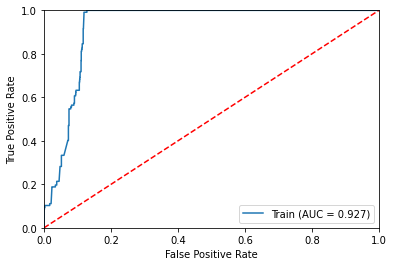

In [180]:
show_results("Train",
             train_for.future_bankruptcy,
             results,
             results_proba[:,1]);

After we have picked the model we can see how the results look on the test data. Here are the results on the test set.

Accuracy:  0.935
F1-score:  0.937
AUC score:  0.944

Confusion Matrix: 

 col_0              0.0  1.0
future_bankruptcy          
0.0                303   16
1.0                  8   42


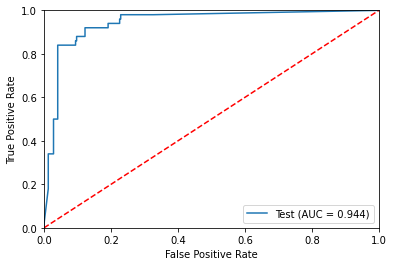

In [181]:
results_test = clf.predict(test_for[ALL_FEATURES])
results_proba_test = clf.predict_proba(test_for[ALL_FEATURES])

try: 
    show_results("Test",
             test_for.future_bankruptcy,
             results_test,
             results_proba_test[:,1]);
except: # Edge case, all y_true are equal
    print('Show results match:')
    print ((test_for.future_bankruptcy==results_test).values)

When we are happy with the results we will save the model for future use.

In [182]:
# We will save the model for future use
dump(clf,'Data/Models/Industrials_clf.joblib')

['Data/Models/Industrials_clf.joblib']

### Create classifier

We will write the custom classifier. The classifier contains the best features we found in the research above and load the models from the files for each sector.

In [183]:
# Warp it all together

class BankruptcyClassifier():
    def __init__(self):
        import sklearn
        if sklearn.__version__ != '0.23.1':
            raise Warning('Sklearn version is not "0.23.1",\n\
                           this may result in different and unexpected results.')
        
        self.params = {
            10: {
                  'sector_name':'Energy',
                  'clf_file':'Data/Models/Energy_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                },
            15: {
                  'sector_name':'Materials',
                  'clf_file':'Data/Models/Materials_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                },
            20: {
                  'sector_name':'Industrials',
                  'clf_file':'Data/Models/Industrials_clf.joblib',
                  'feature_list': ['total_assets_mul_eps', 'working_capital_mul_retained_earnings',
                                   'working_capital_mul_eps', 'working_capital_mul_current_liabilities',
                                   'retained_earnings_mul_eps']
                },
            25: {
                  'sector_name':'Consumer Discretionary',
                  'clf_file':'Data/Models/Consumer_Discretionary_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                },
            30: {
                  'sector_name':'Consumer Staples',
                  'clf_file':'Data/Models/Consumer_Staples_clf.joblib',
                  'feature_list': ['total_assets_mul_eps', 'working_capital_mul_retained_earnings',
                                   'working_capital_mul_eps', 'working_capital_mul_current_liabilities',
                                   'retained_earnings_mul_eps']
                },
            35: {
                  'sector_name':'Health Care',
                  'clf_file':'Data/Models/Health_Care_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                },
            40:{
                  'sector_name':'Financials',
                  'clf_file':'Data/Models/Financials_clf.joblib',
                  'feature_list': ['total_assets_mul_eps', 'working_capital_mul_retained_earnings',
                                   'working_capital_mul_eps', 'working_capital_mul_current_liabilities',
                                   'retained_earnings_mul_eps']
                },
            45:{
                  'sector_name':'Information Technology',
                  'clf_file':'Data/Models/Information_Technology_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                },
            50:{
                  'sector_name':'Communication Services',
                  'clf_file':'Data/Models/Communication_Services_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                },
            55:{
                  'sector_name':'Utilities',
                  'clf_file':'Data/Models/Utilities_clf.joblib',
                  'feature_list': ['total_assets_div_working_capital', 'total_assets_div_retained_earnings',
                                   'total_assets_div_ebit', 'total_assets_div_total_liabilities', 
                                   'total_assets_div_market_cap', 'total_assets_div_revenues',
                                   'total_assets_div_eps', 'total_assets_div_current_assets',
                                   'total_assets_div_current_liabilities', 'working_capital_div_retained_earnings',
                                   'working_capital_div_ebit', 'working_capital_div_total_liabilities',
                                   'working_capital_div_market_cap', 'working_capital_div_revenues',
                                   'working_capital_div_eps', 'working_capital_div_current_assets',
                                   'working_capital_div_current_liabilities', 'retained_earnings_div_ebit',
                                   'retained_earnings_div_total_liabilities', 'retained_earnings_div_market_cap',
                                   'retained_earnings_div_revenues', 'retained_earnings_div_eps',
                                   'retained_earnings_div_current_assets', 
                                   'retained_earnings_div_current_liabilities',
                                   'ebit_div_total_liabilities', 'ebit_div_market_cap', 'ebit_div_revenues',
                                   'ebit_div_eps', 'ebit_div_current_assets', 'ebit_div_current_liabilities',
                                   'total_liabilities_div_market_cap', 'total_liabilities_div_revenues',
                                   'total_liabilities_div_eps', 'total_liabilities_div_current_assets',
                                   'total_liabilities_div_current_liabilities', 'market_cap_div_revenues',
                                   'market_cap_div_eps', 'market_cap_div_current_assets',
                                   'market_cap_div_current_liabilities', 'revenues_div_eps',
                                   'revenues_div_current_assets', 'revenues_div_current_liabilities',
                                   'eps_div_current_assets', 'eps_div_current_liabilities',
                                   'current_assets_div_current_liabilities']
                },
            60:{
                  'sector_name':'Real Estate',
                  'clf_file':'Data/Models/Real_Estate_clf.joblib',
                  'feature_list': ['total_assets', 'working_capital', 'retained_earnings', 'ebit', 'market_cap',
                                   'revenues', 'eps', 'current_liabilities']
                }
        }
        
    def predict(self, X, verbose = False):
        
        results = np.zeros(len(X))
        
        for s in np.unique(X.sector_num):
            
            mask = np.where(X.sector_num == s, True, False)
            if mask.sum != 0:
                clf = load(self.params[s]['clf_file'])
                results[mask] = clf.predict(X.loc[mask,self.params[s]['feature_list']])
                if verbose:
                    print('Sector: ', self.params[s]['sector_name'], ' , Classifier:', clf)
                    print('Sector rows:', len(results[mask]))
                    
             
        return results
    
    def predict_proba(self, X, verbose=False):
        
        results = np.zeros((len(X),2))
        
        for s in np.unique(X.sector_num):
            
            mask = np.where(X.sector_num == s, True, False)
            if mask.sum != 0:
                clf = load(self.params[s]['clf_file'])
                results[mask] = clf.predict_proba(X.loc[mask,self.params[s]['feature_list']])
                if verbose:
                    print('Sector: ', self.params[s]['sector_name'], ' , Classifier:', clf)
                    print('Sector rows:', len(results[mask]))
             
        return results

We will print the results on the training set. We set the verbose to True so we can see for each sector the type of classifier used (together with the parameters) and the number of rows in the training data for that sector.

Sector:  Energy  , Classifier: MLPClassifier(activation='tanh', beta_1=0.5, beta_2=0.599, early_stopping=True,
              hidden_layer_sizes=(10, 20, 50, 20, 10, 10, 5),
              learning_rate='adaptive', max_iter=2000, random_state=0)
Sector rows: 502
Sector:  Materials  , Classifier: RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=3,
                       max_samples=0.5, n_estimators=200, n_jobs=-1,
                       random_state=0)
Sector rows: 806
Sector:  Industrials  , Classifier: SVC(C=1000000.0, cache_size=2000, class_weight='balanced', degree=4,
    probability=True, random_state=0)
Sector rows: 1837
Sector:  Consumer Discretionary  , Classifier: RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=3,
                       max_samples=0.5, n_estimators=200, n_jobs=-1,
                       random_state=0)
Sector rows: 1526
Sector:  Consumer Staples  , Classifier: RandomForestClassifier(class_weight='balanced', max

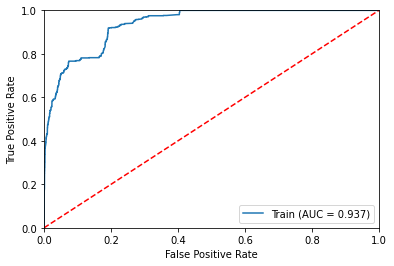

In [184]:
bc = BankruptcyClassifier()

# Train results
results = bc.predict(train, verbose = True)
results_proba = bc.predict_proba(train)
show_results('Train', train.future_bankruptcy, results, results_proba[:,1]);

Here are the results on the test data, which we can use to compare to the other models.

Accuracy:  0.898
F1-score:  0.897
AUC score:  0.909

Confusion Matrix: 

 col_0   0.0  1.0
row_0           
0.0    1514   89
1.0     110  247


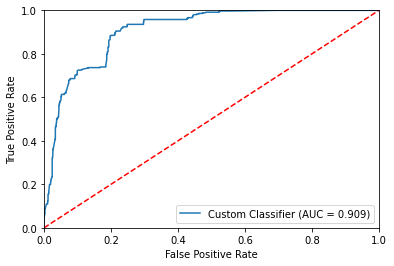

In [185]:
# Test results

results_test = bc.predict(test)
results_proba_test = bc.predict_proba(test)

model_name = 'Custom Classifier'

metrics_df, ROC_curve_df = show_results(model_name, y_test, results_test, results_proba_test[:,1])

advanced_metrics.loc[model_name] = metrics_df.values[0]
advanced_ROC_curve_df.loc[model_name] = ROC_curve_df.values[0]

# advanced_metrics

Let us do some per sector analysis. We can see that for some sectors the model performs well while for others it doesn't. For instalnce fo the materials industry we get perfect results.

In [186]:
# For some sectors we get 100% accuracy rate

results_materials = bc.predict(test.query('sector_num==15'))
results__proba_materials = bc.predict_proba(test.query('sector_num==15'))
try:
    show_results('Materials',
                 test.query('sector_num==15').future_bankruptcy,
                 results_materials,
                 results__proba_materials[:,1]);
except:
    print('Accuracy Score', skm.accuracy_score(test.query('sector_num==15').future_bankruptcy, 
                                               results_materials))

Accuracy Score 1.0


Let's plot the results per sector

Sector Name: Health Care
Accuracy:  0.823
F1-score:  0.823
AUC score:  0.828

Confusion Matrix: 

 col_0              0.0  1.0
future_bankruptcy          
0.0                169   22
1.0                 22   35
Sector Name: Energy
Accuracy:  0.668
F1-score:  0.672
AUC score:  0.739

Confusion Matrix: 

 col_0              0.0  1.0
future_bankruptcy          
0.0                 62   23
1.0                 48   81
Sector Name: Consumer Discretionary
Accuracy:  0.882
F1-score:  0.886
AUC score:  0.954

Confusion Matrix: 

 col_0              0.0  1.0
future_bankruptcy          
0.0                232   25
1.0                 13   53
Sector Name: Communication Services
Accuracy:  0.898
F1-score:  0.889
AUC score:  0.953

Confusion Matrix: 

 col_0              0.0  1.0
future_bankruptcy          
0.0                 44    0
1.0                  6    9
Sector Name: Industrials
Accuracy:  0.935
F1-score:  0.937
AUC score:  0.944

Confusion Matrix: 

 col_0              0.0  1.0
future_bankr

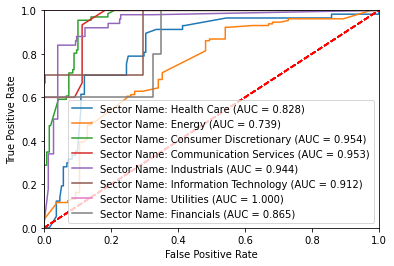

In [187]:
def result_by_sector(model, data):
    for _, row in data.reset_index()[['sector_num','sector_txt']].drop_duplicates().iterrows():
        sector = row.sector_num
        results_test = model.predict(test.query('sector_num==@sector'))
        results_proba_test = model.predict_proba(test.query('sector_num==@sector'))
        if np.unique(results_test).shape != (1,):
            print('Sector Name: ' + row.sector_txt)
            show_results('Sector Name: ' + row.sector_txt,
                         test.query('sector_num==@sector').future_bankruptcy,
                         results_test,
                         results_proba_test[:,1]);
        else: # F1-score and auc fails when there is only one class in the y_true
            print('Sector Name: ' + row.sector_txt)
            print('Accuracy Score', skm.accuracy_score(test.query('sector_num==15').future_bankruptcy, 
                                                   results_materials))
            
result_by_sector(bc, data)

We can see that the AUC score is not uniform between sectors. If fact it is very dispersed. We can see that in certain sectors such as the real estate, consumer staples and materials sectors achieved 100% accuracy score, while in others our scores were very low. This could be due to the way in which we trained our models, but it could also due to the fact which is known that certain sectors are more volatile than others, making them less predictable. We believe that this plays a role in our results.

#### Conclusions

The attempt to build a custom classifier was an interesting one. We decided to try it base on the fact that we saw different behavior for different sectors during the data exploration. We can say that the end results are not satisfying, as it underperforms many of the other models, including Altman's Z-Scores. We would like to summarize a few points:

1. We believe that the model is underperforming due to a small amount of data for each sector which hurts it's ability to achieve inclusion ability.
2. The bad scoring did not spread evenly throughout all the sectors. Some of sectors got good results, some of them really bad ones.
3. Random Forest Classifiers, when they worked well, outperformed on some models, resulted in very good results (minimal AUC is 0.953, 3 sectors with 100% accuracy rate )
4. In the Energy and Health Care sectors the data was widely dispersed in the first place. We anticipated poor results in advance. Financially speaking those are high risk, volatile sectors and that is why it makes sense that results are poor.
5. For solid sectors like Real Estate, Materials, Industrials and others, where the market has years of experience with scoring, the results were much better.

## 9. Summary and Conclusions

Before we present our results and summarize our conclusions, we would like to emphasize a few points. This project an educational project. Our goal was to learn how to implement what we have learnt in the workshop and experience "a day in the life of a data scientist". The goal was not to conduct academic research or alternatively create model that would be part of a commercial product. As such it was more important for us to allocate our effort into practicing as much as we could of what we have learnt in the workshop. We also wanted to try to play around with advance libraries and techniques in order to gain some experience with them. All this while keeping the scope of our project reasonable. The fact that we may not be able to arrive at a clear-cut answers to the questions we asked in the beginning of the project is less important than what we have learnt.

That being said, we are ready to analyze our results. In our analysis are trying to compare the performance of various models that we built in an attempt to answer the question can we beat Altman's Z-Scores and which of models gives the best results. We used the AUC score to compare the different models. If the difference between the AUC score of two models is large than it is obvious that one model is better than the other, that one technique is better than the other. What happens if the difference is small? In such a case you cannot reach a clear-cut conclusion for which model or technique is better. Maybe with more or better data or better hyperparameters it is possible to train better models and have the better AUC score flip from one model to the other. 

After pointing that out we will start to analyze our results.

### Summary of results

**Results for models on dataset 1 (section 7.3)**

In [188]:
set1_metrics

accuracy        f1       auc                conf_matrix
Model                                                                       
Z-Score              0.887755  0.885116  0.918505   [[1513, 90], [130, 227]]
Z"-Score             0.886224  0.885004  0.928064  [[1501, 102], [121, 236]]
Logistic Regression  0.913265  0.915949  0.966292   [[1486, 117], [53, 304]]
Random Forest        0.900000  0.900323  0.953190   [[1502, 101], [95, 262]]
SVM                  0.914286  0.917156  0.958285   [[1484, 119], [49, 308]]
Neural network       0.887245  0.876790  0.955548   [[1558, 45], [176, 181]]

**Results for models on dataset2 with both 'total_liabilities' and 'current_assets' removed (section 7.4)**

In [189]:
set2_metrics1

accuracy        f1       auc               conf_matrix
Model                                                                      
Logistic Regression  0.914796  0.917964  0.960746  [[1480, 123], [44, 313]]
Random Forest        0.901020  0.901857  0.951601  [[1498, 105], [89, 268]]
SVM                  0.911735  0.914727  0.955928  [[1481, 122], [51, 306]]
Neural network       0.890816  0.876967  0.959350  [[1579, 24], [190, 167]]

**Results for models on dataset2 with only 'current_assets' removed (section 7.4)**

In [190]:
set2_metrics2

accuracy        f1       auc               conf_matrix
Model                                                                      
Logistic Regression  0.914796  0.917964  0.960805  [[1480, 123], [44, 313]]
Random Forest        0.901531  0.901477  0.950893   [[1507, 96], [97, 260]]
SVM                  0.911735  0.914727  0.955603  [[1481, 122], [51, 306]]
Neural network       0.872959  0.853921  0.950221  [[1572, 31], [218, 139]]

**Results for advanced models on dataset2 (with feature engineering) (section 8)**

In [191]:
advanced_metrics

accuracy        f1       auc               conf_matrix
Model                                                                         
TPOT exported_pipeline  0.896939  0.886332  0.962055  [[1573, 30], [172, 185]]
Custom Classifier       0.898469  0.897261  0.908604  [[1514, 89], [110, 247]]

If we look at our results, we can see that most of our models have a AUC score of between 0.95-0.967. The exceptions are the Z-Scores and the custom classifier (from section 8.2), which scored significantly lower. Since the difference between the AUC scores of our models is so big, we think it is safe to say that our models outperform Altman's Z-Scores. 

The question is which combination of dataset and model gives the best result? Since the differences in the AUC scores aren't very high, we can't give a clear-cut answer to that question. Even though we don't have a clear-cut answer we will try to answer the question anyway. 

If we look at a combination of the AUC score and the confusion matrix, it seems as if both logistic regression and SVM perform better than the other models. We discussed this in section 7.3.6. This holds true not only to the models on dataset1 but for all the other models on other datasets (including TPOT). We can also see adding more features doesn't necessarily help give better results. In fact, in some cases such as linear regression, it seems to hurt the results. Again, we can't clearly make a claim that adding more features doesn't help create better models, since maybe with a larger dataset this claim could be disproved.

In general, it seems like linear regression performs the best and it gives especially good results on dataset1. We make that statement with reservations because of everything we stated above.

### Future improvements

After we completed the project we came across some insights that would help if we were to continue this project. 

The first has to do with the data we collected. We managed to collect a good sized dataset with 17301 data points after we removed the outliers. But if we think about the dataset consists of datapoints created from a time series of financial information of various companies. Unless there is a dramatic event, it is unlikely that a companies finances would alter allot from one quarter to another. That means that there is a great chance that the data points for a single company, that is not about to declare bankruptcy, are highly correlated from one quarter to the next. That means that even though it may seem like we have allot of datapoints, allot of them are highly correlated to other datapoints and aren't contributing information. They are not helping to span the input space. So it could be that in essence that our dataset is much smaller than we think. No doubt that adding more companies (both bankrupt and non-bankrupt) would help rectify this. There is a good chance that if you could collect more data you could get better results from the models.

The second thing has to do with tuning the hyperparameters. Even though it is beyond the scope of the workshop, we know that the best way to choose training hyperparameters is to do hyperparameter optimization. This is done by choosing a range of hyperparameters and training each time on a different combination until to get the best model. In order to implement this technique though you need to check the results on a validation set in order not to overfit. In our case, since our dataset isn't extremely large, we wouldn't have enough data to do a decent training, validation, test split. 

A third is that our handling of our data which came from time series data was far from optimal. Even though our data was time series, we didn't handle it as such. We converted it to datapoints. Had we handled it as time series, we could have taken advantage of changes in feature values from one quarter to another and maybe gotten better results. Also the fact that we chose a period of two years until a bankruptcy is problematic. What would have happened if we would have chosen 1 year or 3 years? Maybe it would have been better not to treat the problem as a classification problem but as aa regression problem?

So here are some suggestions for improvement:
1. Collect more data - This is easier said than done.
2. Do hyperparameter optimization on models - Need allot of good quality data for this.
3. Treat the data as time series.

### What we have learnt

Since this project is a learning exercise, what we have learnt in the process is more important than the results we got. It is safe to say that we chose a challenging project and as a result we have learnt allot. 

1. The first thing we learned is that the problem domain that deals with financial markets is tough. There are a few reasons for this. The first is that the financial models change over time. Reasons for bankruptcies in the 60s might be different than they are today. That means that even if you build a very accurate model, it may be irrelevant in the future. 

2. The second is that sourcing good clean data in general and the financial sector in particular is difficult. Our initial expectation was that it wouldn’t be too difficult to gather the data we needed. This is due to the fact that the stock market is highly regulated by the SEC and publicly traded companies are obliged to pass important financial and operational information (that we needed). We expected that the SEC would hold all the data we needed, making it easily accessible and in a form that is easy to manipulate. This was not the case. We did find plenty of different sources for financial information, but it was difficult to find a single source that held all the information we needed. Stitching information from different sources also became impossible since there are inconsistencies even things such as accounting information (probably due to differences in definitions). We assume that these kinds of problems could also arise when trying to gather financial information in other problems as well. 

3. Another thing we learnt was that when turning time series data to datapoints special care needs to be taken. The changes between each time step are small, so the subsequent data points are similar. Maybe in such cases data should be treated as time series, maybe looking at changes of features from one time step to another.

4. We learnt that working with unbalanced data is difficult. We did learn than models that have an option to "balance" the data help in getting better results.

5. Another thing learnt is even if an event happens allot it could still be considered a rare event. In our case bankruptcies are not uncommon, but if you consider that most of the time companies don't declare bankruptcy in the subsequent 2 years, then it is in fact a rare event. Rare events create unbalanced datasets which are hard to work with. 

6. Despite all these hurdles, we still did get pretty good results even with the Z-Scores. This maybe attests to the problem itself. There may show that in real life, just by looking at financial information there are clear indications that a company is in financial trouble and bankruptcy is inevitable. This makes us optimistic that it should be possible to build a model with high predictability. In order to do this, you would probably need more data and treat the data differently than we did. 

7. We got to know sklearn much better. While working on the TPOT section we were exposed to new sklearn features we have never heard of before. While building the model in section 8.2 we learned how build a custom estimator that fits the scikit-learn API which was interesting by itself. 

8. TPOT Helped us in the understanding the importance of normalization and pipelines during the building of the models.

All in all it we can say that we have learnt allot and got some hands on experience  through this project.